In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, t, chisquare, chi2, expon
import scipy.integrate as spi

In [2]:
# Equations from part 1
def calculate_probability(favorable, sample_space):
  return favorable/sample_space

def get_permutation(number_of_elements):
  if number_of_elements < 0:
    raise ValueError(f"Number of elements {number_of_elements} cannot be less than 0")

  product = 1
  for i in range(number_of_elements, 0, -1):
    product = product * i
  return product


def get_combination(number_of_elements, position_to_fill):
  if position_to_fill > number_of_elements:
    raise ValueError(f"Number of elements {number_of_elements} must be greater than positions to fill {position_to_fill}")

  n_factorial = get_permutation(number_of_elements)
  n_minus_p_factorial = get_permutation(number_of_elements - position_to_fill)
  p_factorial = get_permutation(position_to_fill)

  return n_factorial / (p_factorial * n_minus_p_factorial)

# 1. Probability Distribution

A **distribution** are the possible values that a variable can take and how frequently they occur.

**Notations:**

- Uppercase 'Y': Indicates the actual outcome on an event.

- Lowercase 'y': Indicates one of the possible outcomes of an event.


The likelihood (probability) of reaching an outcome 'Y' is $P(Y=y)$ or $p(y)$. Therefore, the notation $P(Y=y)$ is the probability that the outcome 'Y' of an event is 'y'.

For example, 'Y' can be the number of red marbles that we draw out from a bag. The value 'y' can be 3. So, in this case $P(Y=3)$ or $p(3)$ is the probability of drawing out exactly 3 red marbles from a bag.

Since $p(y)$ denotes the probability of each distinct outcome, we call this the probability function.

Therefore, **a probability distribution measures the likelihood of an outcome depending on how often it is featured in the sample space.**

- When we have a **finite** number of possible outcomes we can create a frequency distribution table to show the probability of each outcome.

- When we have an **infinite** number of possible outcomes we cannot create a table to show the probability of each possible outcome since there are inifinitely many outcomes. In that case, we create a graph or a probability density graph that shows how the probability changes for a range of outcome in the graph.



## Discrete Distribution

When we have a finite number of outcomes for an event and if we plot the probabilities of all the finite outcomes, then the distribution is known as discrete distribution.

For example, we have 10 runners. There were 1000 different games and we have a record of who came first in each of the race. We have a race next day and we want to find out what is the probability of each runner becoming first.

Since a discrete distribution consists of a finite set of values, we usually plot it in a bar chart to see the probability of each outcome.

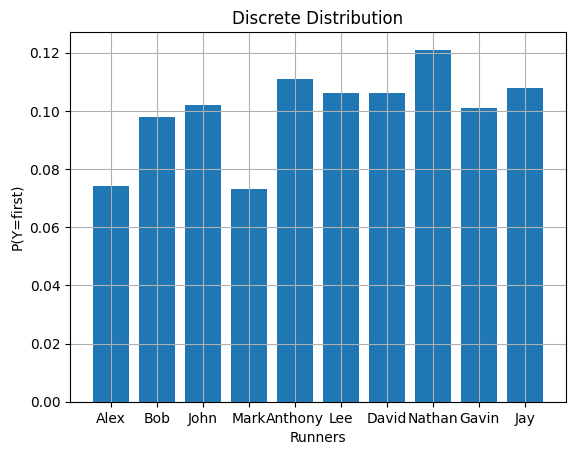

In [3]:
runners = ['Alex', 'Bob', 'John', 'Mark', 'Anthony', 'Lee', 'David', 'Nathan', 'Gavin', 'Jay']
records_of_races = np.random.choice(runners, size=1000)

frequency_of_winning = np.array([ np.count_nonzero(records_of_races == runner) for runner in runners])

plt.figure()
plt.title("Discrete Distribution")
plt.grid()
plt.bar(runners, calculate_probability(frequency_of_winning, records_of_races.size))
plt.xlabel("Runners")
plt.ylabel("P(Y=first)")
plt.show()

## Continuous Distribution

When we have a infinite number of outcomes for an event and if we plot the probabilitiy densities of the infinite outcomes, then the distribution is known as continuous distribution.

For example, we have a code and we want to find the probability of the duration that our code will take to run. It can take any amount of time for the code to run - from milliseconds to days. But usually it takes couple of seconds for the code to run.

In this scenario we cannot divide the time to its smallest unit since time has no smallest unit. So we cannot plot a discrete distribution as given above. We can consider millisecond (ms) to be the smallest unit but in that case we lose accuracy because if the code takes 10 nanoseconds to execute, we will not be able to plot that in the graph.

As we divide the time to smaller units, the accuracy of the probability increases but so does the number of possible outcomes.

In this case we plot the probabilities in a line chart to show how the probability will change for each execution time. Since there are infinite outcomes, we only plot a range of the outcomes according to our needs.

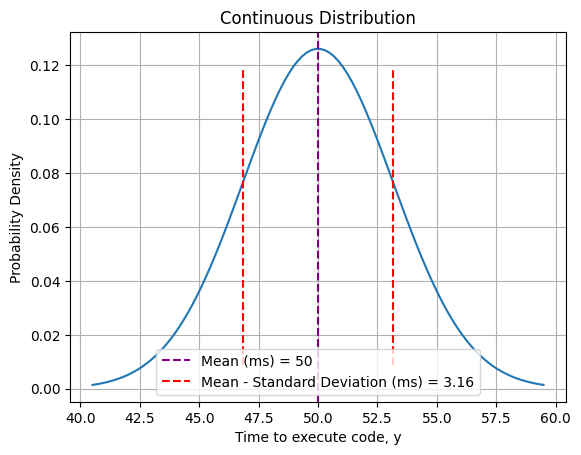

In [4]:
mean_time_for_code_execution = 50 # ms
variance_of_code_execution = 10 #ms
standard_deviation_of_code_execution = np.sqrt(variance_of_code_execution)

# We are plotting the probabilities only for the execution times that are atmost 3 standard deviations away from the mean
start_interval = mean_time_for_code_execution - 3*standard_deviation_of_code_execution
end_interval = mean_time_for_code_execution + 3*standard_deviation_of_code_execution
execution_time = np.linspace(start_interval, end_interval, 100)

# We consider that the probability follows a normal distribution
probabilities_of_each_execution_time = norm.pdf(execution_time, mean_time_for_code_execution, standard_deviation_of_code_execution)


# Plot the distribution with mean and standard deviation
plt.figure()
plt.title("Continuous Distribution")
plt.plot(execution_time, probabilities_of_each_execution_time)
plt.axvline(x = mean_time_for_code_execution, linestyle='--', color='purple', label = f'Mean (ms) = {mean_time_for_code_execution}')
plt.axvline(x = mean_time_for_code_execution - standard_deviation_of_code_execution, ymin = 0.1, ymax = 0.90, linestyle='--', color='red', label = f'Mean - Standard Deviation (ms) = {standard_deviation_of_code_execution:.2f}')
plt.axvline(x = mean_time_for_code_execution + standard_deviation_of_code_execution, ymin = 0.1, ymax = 0.90, linestyle='--', color='red')
plt.grid()
plt.xlabel("Time to execute code, y")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

## Characteristics of distribution

Regardless of whether we have a discrete or a continous distribution, all distributions are identified by two main characteristics:

**a. Mean (also known as expected value for probability distribution)**

Mean of a distribution is its weighted average value. In case of probability distribution, we plot the x-axis as the outcome '$y$' and y-axis as the probability of the outcome '$p(y)$'. We multiply each outcome with its corresponding probability to get the mean. This is also referred to as the expected value.

\begin{equation}
\mu = \sum_{i=0}^n y_i * P(y_i)
\end{equation}

Here,
- 'n' is the total number of outcomes
- '$y_i$' is each outome
- $p(Y_i)$ is the probability of each outcome
- $\mu$ is the mean of the probabilities of all outcomes.

**In statistics and probability, weighted mean is often used interchangeably with expected value since both of them denote the weighted average of a distribution.**

**b. Variance**

It usually shows how spread out the data is. We measure this spread by - how far from the mean all other values are.The more dispersed the data is, the higher its variance will be. It is denoted by $\sigma^2$ where $\sigma$ is the standard deviation of the distribution.

Variance is sum of the squared distance between mean and each outcome multiplied by the probability of each outcome.

\begin{equation}
\sigma^2 = \sum_{i=0}^n (y_i - \mu)^2 * p(y_i)
\end{equation}

Here,
- 'n  is the total number of outcomes
- '$y_i$' is each outome
- $\mu$ is the mean of all outcomes
- $p(y_i)$ is the probability of each outcome
- $\sigma$ is the standard deviation
- $\sigma^2$ is the variance

**Note: The equations provided above calculate the mean and variance for a discrete distribution.**

Usually for a distribution, we calculate the mean and variance along the x-axis (i.e. for the outcomes).

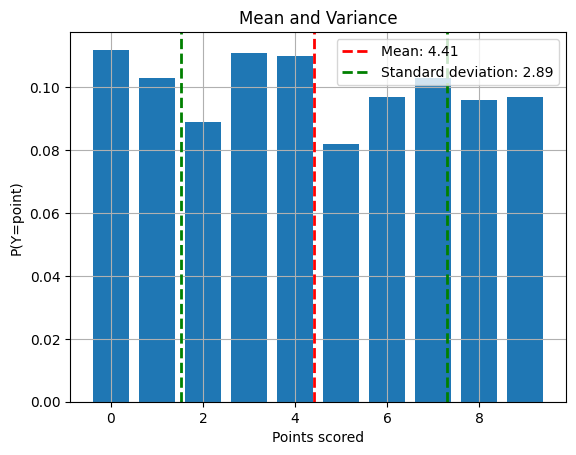

In [5]:
def calculate_discrete_mean(values, probabilities):
  if len(values) != len(probabilities):
    raise ValueError("The arrays must be of the same length")
  if np.round(np.sum(probabilities)) != 1:
    raise ValueError("The total probability must be 1")

  return np.sum(np.array(values) * np.array(probabilities))

def calculate_discrete_variance(values, probabilities):
  if len(values) != len(probabilities):
    raise ValueError("The arrays must be of the same length")
  if np.round(np.sum(probabilities)) != 1:
    raise ValueError("The total probability must be 1")

  mean = calculate_discrete_mean(values, probabilities)
  return np.sum( np.square(np.array(values) - mean) * np.array(probabilities)  )


points = np.arange(10)
points_scored_in_each_match = np.random.choice(points, size=1000)

probability_scoring_a_point = np.array([ np.count_nonzero(points_scored_in_each_match == point) for point in points])/points_scored_in_each_match.size

mean_points = calculate_discrete_mean(points, probability_scoring_a_point)
standard_deviation_of_points = np.sqrt(calculate_discrete_variance(points, probability_scoring_a_point))

plt.figure()
plt.title("Mean and Variance")
plt.grid()
plt.bar(points, probability_scoring_a_point)
plt.axvline(x=mean_points, ymin=0, ymax=1, linewidth=2, color='red', linestyle='--', label=f'Mean: {mean_points:.2f}')
plt.axvline(x=mean_points + standard_deviation_of_points, ymin=0, ymax=1, linewidth=2, color='green', linestyle='--', label=f'Standard deviation: {standard_deviation_of_points:.2f}')
plt.axvline(x=mean_points - standard_deviation_of_points, ymin=0, ymax=1, linewidth=2, color='green', linestyle='--')

plt.xlabel("Points scored")
plt.ylabel("P(Y=point)")
plt.legend()
plt.show()

From the above graph we can see that the red line indicates the mean and the green lines indicate a range of values that is 1 standard deviation away from the mean. Most of the probabilities fall within that interval.

Therefore, in a distribution the mean and standard deviation allows us to find the interval within which most of the data points  lie.

As the variance (or standard deviation) of a distribution increases, the data becomes more spread out as more data points are away from the mean.

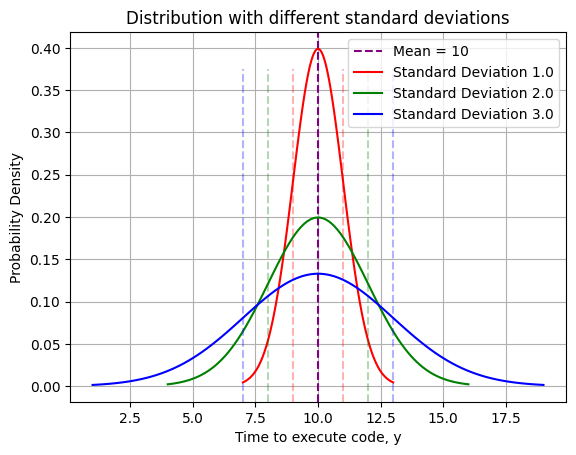

In [6]:
mean = 10
variances = [1, 4, 9]
standard_deviations = [np.sqrt(variance) for variance in variances]
colors = ['red', 'green', 'blue']

x_for_each_standard_deviation = [ np.linspace(mean - 3*standard_deviation, mean + 3*standard_deviation, 100) for standard_deviation in standard_deviations]

plt.figure()
plt.title("Distribution with different standard deviations")
plt.grid()
plt.axvline(x = mean, linestyle='--', color='purple', label = f'Mean = {mean}')

for i in range(len(standard_deviations)):
  plt.plot(
      x_for_each_standard_deviation[i],
      norm.pdf(x_for_each_standard_deviation[i], mean, standard_deviations[i]), label=f'Standard Deviation {standard_deviations[i]}',
      color=colors[i]
      )
  plt.axvline(x = mean + standard_deviations[i], ymin = 0, ymax = 0.90, linestyle='--', color=colors[i], alpha=0.3)
  plt.axvline(x = mean - standard_deviations[i], ymin = 0, ymax = 0.90, linestyle='--', color=colors[i], alpha=0.3)

plt.xlabel("Time to execute code, y")
plt.ylabel("Probability Density")
plt.legend()

plt.show()

We can see from the three distributions above that even though all the distributions have the same mean, the distribution begins to spread out as the variance (or standard deviation) increases.

You will also notice that the value of standard deviation is a value of the x-axis.

So, if the x-axis is the time to execute a code (y) in milliseconds and y-axis is the probability that the code will execute within 'y' milliseconds time i.e. p(y) then,

A mean of '10' means that - on average the code takes ten milliseconds to execute.

A standard deviation of one means that most of the time, the code executes within 9-11 milliseconds.

Therefore, To predict how long our code will take to execute we can say from this distribution (the one with one standard deviation) that the code will execute within 9-11 milliseconds.

When analyzing a distribution, we should know what kind of data we are dealing with - population data or sample data.

## Population data

Population data is the formal way of referring to 'all' the data.

## Sample data
This data is a part of the population data.

As for example, if we survey a department of an organization to find how the employees travel to work - this data collected from the entire deparment will be considered a population data for that department as it includes all employees of that department. However, the same data will be considered as sample data for the employees of the entire company since this data was collected from a set of employees of the company.

When creating a distribution, the **mean** and **variance** of **sample data** is denoted by $\bar x$ and $s^2$ respectively.

When creating a distribution, the **mean** and **variance** of **population data** is denoted by $\mu$ and $\sigma^2$ respectively.



## N-Standard Deviations away from the mean

When we analyze a distribution, we usually try to calculate how far the data points are away from the mean. We calculate this using standard deviation.

**The set of data points in a distribution that is at most $\sigma$ distance away from the mean is said to be 1 standard deviation away from the mean.**

The data points that are at most $2\sigma$ distance away from the mean and above $\sigma$ distance away from the mean is said to be 2 standard deviations away from mean.

The more congested (narrow) the distribution, the more data falls within 1 standard deviation away from the mean. Using this measurement, we can get a general idea of how spread out the data is.

## Mean and Variance

In a distribution, there is a constant relationship between the mean and variance.

**The variance equals to the expected value of the squared difference from the mean from any value.**

\begin{equation}
\sigma^2 = E((Y - \mu)^2) = E(Y^2) - \mu^2 \\
\sigma^2 = E((Y - E(Y))^2) = E(Y^2) - E(Y)^2
\end{equation}

Here,
- 'Y' is one outcome of the distribution.
- $\mu$ is the mean of the distribution.
- $E((Y - \mu)^2)$ is the expected value of the squared difference between the outcome 'Y' and the mean.

## Types of distribution

Usually there are two types of distribution:

- Discrete distribution
- Continuous distribution

However, we can group distributions based on similarity of characteristics that the distributions have. As for example, the type of events where each outcome is equally likely e.g. flipping a coin or drawing a card - these type of events have a **uniform distribution.**

**Events where each outcome is equally likely are known as equiprobable events e.g. flipping a coin or drawing a card.**

## Notation

We use the following notation to describe a distribution:

\begin{equation}
X \sim N (\mu, \sigma^2)
\end{equation}

Here,

- 'N' is the type of distribution
- '$\mu$ is the mean of the distribution
- '$\sigma^2$' is the variance of the distribution
- 'X' is a variable

Usually $\mu$ and $\sigma^2$ are the characteristics of the distribution. However, it may vary based on distribution. The characteristics of a distribution is mentioned within the parenthesis. We read the notation as follows:

**X is a distribution of type 'N' that contains a mean $\mu$ and a variance $\sigma^2$**



The following distributions are discussed in this notebook:

### 1. Discrete Distributions

**a. Uniform Distribution**

The type of events where each outcome is equally likely e.g. flipping a coin or  drawing a card - follow a uniform distribution.


**b. Bernoulli Distribution**

There are events that have only two possible outcomes - True or False e.g. finding the probability that a news is true or the probability that a news is false.

**Note:** Any distribution that has only two possible outcomes e.g. flipping a coin can be converted into a Bernoulli event. As for example, when calculating the probability of head or tails we can consider head as 'true' and tails as 'false' or vice versa.

**Note:** Bernoulli distribution is a distribution that is made for just one trial.

**c. Binomial Distribution**

When we perform an experiment (multiple trials) that has a Bernoulli distribution then the distribution that we get is called a Binomial distribution.

Here, the outcome of each trial is a Bernoulli event i.e has just two - true or false outcomes. However, we perform many trials (or one experiment).

As for example, performing one trial (flipping a coin) to see the probability of head and tails is a Bernoulli event.

However, if we want to calculate what is the probability of heads landing exactly twice if we flip the coin 10 times, then we need to perform 10 trials (whih is one experiment). In this case, the distribution that we will get is a Binomial distribution.

**d. Poisson Distribution**

We use this distribution when we want to find out how unusual an event frequency is for a given interval. It does not require the probability of an event - rather it requires the probability of the number of times an event is likely to occur within a given timeframe.

For example, we know that on average a firefly lights up 8 times in 90 seconds. We want to know what is the probability of it lighting up 10 times in 90 seconds.

To solve this problem we need to create a graph where 'x-axis' contains the number of a firefly can light up in 90 seconds - it can be anything starting from 0 to infinity. On the 'y-axis' we will show the probability of it lighting up the corresponding number of times.

In the above scenario - 'lighting up' is an event. But we are not plotting the event in the graph. We are plotting the frequency (or number of it can light up in 90 seconds) of the event in x-axis and the probability of that frequency in 'y-axis'. So, we can model this distribution as a Poisson distribution.

### 2. Continuous Distributions

**a. Normal Distribution**

The outcome of many events in nature closely resemble this distribution. So, it is called normal distribution.

**b. Student's-T Distribution**

When we perform an experiment that has a normal distribution and if we have limited data - in that case we use a Student's-T distribution. It is an approximation of the normal distribution.

**c. Chi-Squared Distribution**

It is an asymmetric continuous distribution and it only consists of non-negative values. The disribution is often skewed to the left.

This distribution does not often mirror real life scenario. However, it is used for hypotheis testing.

**d. Exponential Distribution**

This type of distributon is observed when an event is rapidly changing. As for example, the increase in number of views of an online article changes rapidly in the first few days of release and then it slowly reduces as more and more people have already read the article.

**e. Logistic Distribution**

This type of distribution is used for forecast analysis. It is used when we we have a continuous input of random variables and we want to find the probability of the outcome - where the number of possible outcomes are two. It is useful for determining a cut-off point for a successful outcome.

## Uniform Distribution

When all outcomes of an event is equally likely i.e. equiprobable, then the distribution of the probability of those outcomes is known as uniform distribution.

For example, the rolling of standard dice has six equiprobable outcomes. So, the probability of each of the outcome is $\frac{1}{6}$.

According to the definition:

\begin{equation}
X \sim Uniform(a, b)
\end{equation}

The above equation is read as follows: The distribution 'X' follows a uniform distribution where the outcome starts from 'a' and ends in 'b'.

Therefore, for the rolling of dice, the equation will be as follows:

\begin{equation}
X \sim Uniform(1, 6)
\end{equation}

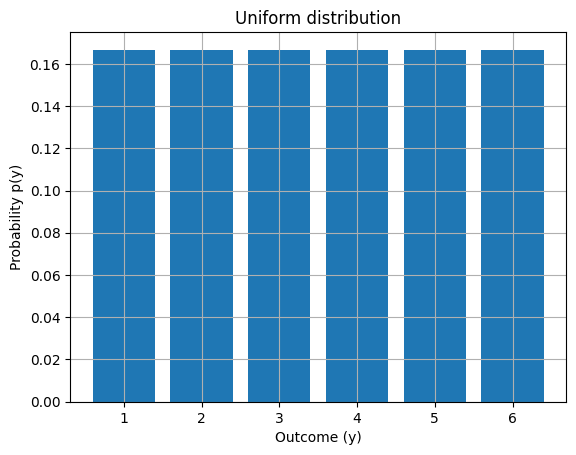

In [7]:
dice = np.arange(1, 7, 1)
probabilities = np.array([1/6 for i in range(len(dice))])

plt.figure()
plt.title("Uniform distribution")
plt.bar(dice, probabilities)
plt.xlabel("Outcome (y)")
plt.ylabel("Probability p(y)")
plt.grid()
plt.show()

In [8]:
mean = calculate_discrete_mean(dice, probabilities)
print(f"Mean: {mean:.2f}")

variance = calculate_discrete_variance(dice, probabilities)
print(f"Variance: {variance:.2f}")

Mean: 3.50
Variance: 2.92


**Mean**

The mean of the uniform distribution of a dice is as follows:

\begin{equation}
\mu = \sum_{i=1}^6 i * p(i) = (1*\frac{1}{6}) + (2*\frac{1}{6}) + ... + (6*\frac{1}{6}) = 3.5
\end{equation}

**Variance**

The variance is as follows:

\begin{equation}
\sigma^2 = \sum_{i=1}^6 (i - \mu)^2 * p(i) \\
\sigma^2 = (1-3.5)^2 * 1/6 + (2-3.5)^2 * 1/6 + (3-3.5)^2 * 1/6 + (4-3.5)^2 * 1/6 + (5-3.5)^2 * 1/6 + (6-3.5)^2 * 1/6 \\
\sigma^2 \approx 2.92
\end{equation}

**For a uniform distribution, the mean and standard deviation does not provide us much information since each outcome is equally likely. So, for this distribution does not provide predictive power.**

## Bernoulli Distribution

In a Bernoulli distribution we only have two type of outcome: success or failure. The definition is as follows:

\begin{equation}
X \sim Bern(p)
\end{equation}

The above equation states that 'X' follows a Bernoulli distribution where 'p' is the probbability of success.

**The following type of events follow a Bernoulli Distribution:**

- An event that has 1 trial and 2 possible outcomes.


For example:

- 1 trial of a coin flip.
- A single 'True' or 'False' type of question.

Usually when performin a Bernoulli trial, we know the probability of one of the outcome or we have a record of past data indicating some **experimental** probability.

The graph of a Bernoulli Distribution contains only two bars - each containing the probability of its corresponding outcome.

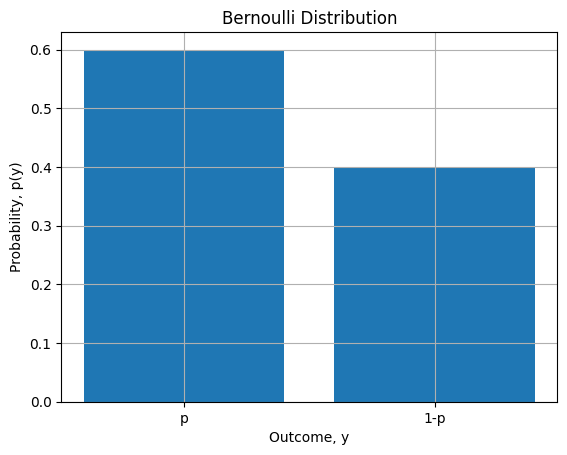

In [9]:
probability_of_success = 0.6
probability_of_failure = 1 - 0.6

plt.figure()
plt.title("Bernoulli Distribution")
plt.bar(['p', '1-p'], [probability_of_success, probability_of_failure])
plt.xlabel("Outcome, y")
plt.ylabel("Probability, p(y)")
plt.grid()
plt.show()

In [10]:
mean = calculate_discrete_mean([1, 0], [probability_of_success, probability_of_failure])
variance = calculate_discrete_variance([1, 0], [probability_of_success, probability_of_failure])
print(f"Mean is {mean:.2f} and variance is {variance:.2f}")

Mean is 0.60 and variance is 0.24


The mean and variance of a Bernoulli distribution also does not provide any useful information since it is just the midpoint of two outcomes.

For the above graph, the mean is 0.6 and the variance is 0.24. This information is not useful for any kind of prediction.

**Depending on which outcome we assign zero or one, our mean and variance will vary. We usually denote the higher probability with 'p' i.e 1 and the one with lower probability as (1-p).**

For a Bernoulli distribution, the mean is as follows:

\begin{equation}
\mu = \sum_{i=0}^1 i * p(i) = 1 * p + 0 * (1-p) = p
\end{equation}

The **variance** of a Bernoulli event is always $p(1-p)$

\begin{equation}
\sigma_{bern}^2 = E( (y - \mu)^2 ) \\
\sigma_{bern}^2 = E( (y - p)^2 ) \\
\sigma_{bern}^2 = E( y^2 - 2 p y + p^2 ) \\
\sigma_{bern}^2 = E( y^2) - 2 p E(y) + p^2 \\
\end{equation}

Since y takes the value 1 with probability p and 0 with probability (1-p), the value of $y^2$ is $y$ (as $1^2 = 1$ and $0^2 = 0$) the expected value $E(y^2)$ is as follows:

\begin{equation}
E(y^2) = E(y)
\end{equation}

The expected value $E(y)$ is as follows:
\begin{equation}
E(y) = 1 * p + 0 * (1-p) = p
\end{equation}

So, from the equation of variance we get

\begin{equation}
\sigma_{bern}^2 = E( y^2) - 2 p E(y) + p^2 \\
\sigma_{bern}^2 = p - 2 p p + p^2 \\
\sigma_{bern}^2 = p - 2p^2 + p^2 \\
\sigma_{bern}^2 = = p - p^2 \\
\sigma_{bern}^2 = p(1-p)
\end{equation}

So, for a Bernoulli distribution, the mean is $p$ and the variance is $p(1-p)$.

### Mean of Bernoulli Distribution

As shown above the mean ($\mu$) or expected value ($E(y)$) of a Bernoulli distribution is as follows:

\begin{equation}
\mu = E(y) = p
\end{equation}

### Variance of Bernoulli Distribution

As shown above the variance ($\sigma^2$) of a Bernoulli Distribution is as follows:

\begin{equation}
\sigma^2 = p(1-p)
\end{equation}

In [11]:
def calculate_variance_for_bernoulli_distribution(probability):
  return probability * (1 - probability)

unfair_coin = [1, 0] # Heads = 1, Tails = 0
probabilities = [0.6, 0.4]

print(f"Variance calculated using variance formula: {calculate_discrete_variance(unfair_coin, probabilities)}")
print(f"Variance calculated using variance formula of bernoulli event: {calculate_variance_for_bernoulli_distribution(probabilities[0])}")

Variance calculated using variance formula: 0.24
Variance calculated using variance formula of bernoulli event: 0.24


## Binomial Distribution

A binomial events is a sequence of identical Bernoulli events. A binomial distribution is defined as follows:

\begin{equation}
X \sim B(n, p)
\end{equation}

The above equation states that: 'X' follows a binomial distribution with 'n' trials with a probability of success 'p' in each trial.

A Bernoulli distribution is a binomial distribution with a single trial.

Suppose we are flipping an unfair coin where the probability of head is 0.6. We want to calculate how what is the probability of getting exactly '5' heads if we flip the coin 10 times.

In this scenario, each flip (or trial) is a Bernoulli event and the complete set of 10 flips (or the experiment) is a Binomial event.

**Expected value**

In the previous part we discussed expected value. It is the outcome that we expect to occur when we run an experiment. The equation for expected value is as follows:

\begin{equation}
E(y) = p(y) . n
\end{equation}

Here,
- y = is a specific outcome
- P(y) = the probability of getting the specific outcome
- n = Number of trials
- E(y) = Expected value i.e. number of times we expect to get the outcome 'y' if we perform 'n' trials


From the above equation:

- $E(Bernoulli)$: Expected value of a Bernoulli event calculates which outcome we expect for a single trial i.e. when $n = 1$

- $E(Binomial)$: Expected value of a Binomial event calculates how many times we expect to get a specific outcome when we perform 'n' trials.


For the example mentioned above, for each trial we calculate the probability of heads (which is a bernoulli event). For 10 trials we calculate the probability of getting heads exactly 'n' times.

### Example

Suppose we have an unfair coin where the probability of head is $0.6$. **We want to calculate the probability of getting heads exactly 2 times if we flip the coin 3 times.**

To calculate this probability, we need to know how many ways are there to get 2 heads if we flip the coin 3 times. Let us plot the possible outcomes in a table:

| Trial 1 | Trial 2 | Trial 3 | No. of Heads |
| --- | --- | --- | --- |
| Heads | Heads | Heads | 3 |
| Heads | Heads | Tails | 2 |
| Heads | Tails | Heads | 2 |
| Heads | Tails | Tails | 1 |
| Tails | Heads | Heads | 2 |
| Tails | Heads | Tails | 1 |
| Tails | Tails | Heads | 1 |
| Tails | Tails | Tails | 0 |

From the above table we can see that there are  3 ways to get exactly 2 heads.

However, if we have many trials - creating a table each time is very difficult. So, to calculate the number of ways in which we can get the desired outcome exactly 'm' times out of 'n' trials, we can use the formula for **combination with repetition**.

**Calculating number of ways we can get outcome exactly m times**

The equation for combination (with repetition) is as follows:

\begin{equation}
C_m^n = \frac{n!}{m!(n-m)!}
\end{equation}

So, for the above equation we have '3' trials and we want to get exactly '2' heads. So, the number of possible combinations are:

\begin{equation}
C_2^3 = \frac{3!}{2!(3-2)!} = \frac{6}{2*1} = 3
\end{equation}

Therfore, from this equation we can easily calculate that there are 3 ways out of 8 to get exactly 2 heads.

**Calculating the probability of getting outcome exactly m times**

- Out of 3 flips, if we want to calculate the probability of getting heads **exactly** 2 times, we also need to consider the probability of getting tails **exactly** 1 time. If we do not take this into account, then we will be calculating the probability of getting heads **atleast** 2 times.

### Equation for creating a Binomial Distribution

Therefore, the equation to get the probability of heads exactly 'y' times out of 'n' trials is as follows:

\begin{equation}
p(y) = C^n_y . p^y . (1-p)^{n-y}
\end{equation}

Here,

- 'y' is the number of times we get heads
- 'n' is the total number of trials
- $C^n_y$ is the number of ways we can get 'heads' exactly 'y' times
- $p^y$ is the probability of getting heads 'y' times to the power of y
- $(1-p)^{n-y}$ is the probability of not getting heads (or getting tails) to the power of the remaining number of times.

For our example, the result becomes:

\begin{equation}
P(Y=2) = C^3_2 . (0.6)^2 . (1-0.6)^{3-2} = 3 * 0.36 * 0.4 = 0.432 \approx 43.2\%
\end{equation}



Probability of getting exactly 2 heads is : 0.43


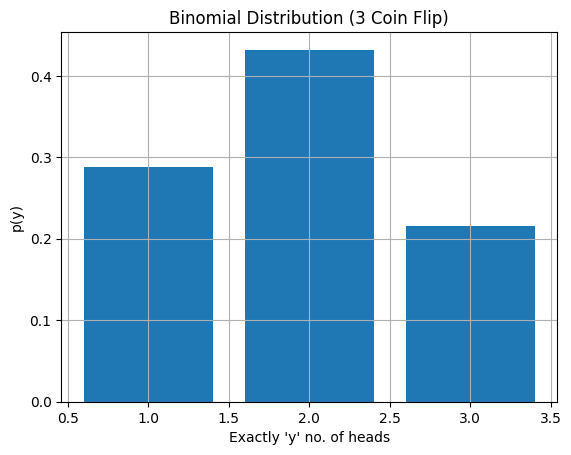

In [12]:
probability_of_heads = 0.6
probability_of_not_heads = 0.4
total_no_of_flips = 3
required_number_of_heads = np.arange(1, total_no_of_flips+1, 1)

probabilities_of_exactly_m_heads = []

for no_head in required_number_of_heads:
  p_y = np.power(probability_of_heads, no_head)
  one_minus_p_n_minus_y = np.power(probability_of_not_heads, total_no_of_flips - no_head)
  probabilities_of_exactly_m_heads.append(
      get_combination(total_no_of_flips, no_head) * p_y *  one_minus_p_n_minus_y # calculate p(y)
  )

print(f"Probability of getting exactly 2 heads is : {probabilities_of_exactly_m_heads[1]:.2f}")

plt.figure()
plt.title(f"Binomial Distribution ({total_no_of_flips} Coin Flip)")
plt.grid()
plt.bar(required_number_of_heads, probabilities_of_exactly_m_heads)
plt.xlabel("Exactly 'y' no. of heads")
plt.ylabel("p(y)")
plt.show()

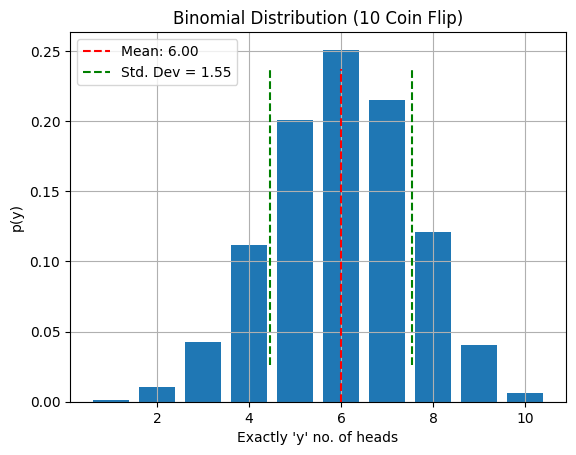

In [13]:
probability_of_heads = 0.6
probability_of_not_heads = 0.4
total_no_of_flips = 10
required_number_of_heads = np.arange(1, total_no_of_flips+1, 1)

probabilities_of_exactly_m_heads = []

for no_head in required_number_of_heads:
  p_y = np.power(probability_of_heads, no_head)
  one_minus_p_n_minus_y = np.power(probability_of_not_heads, total_no_of_flips - no_head)
  probabilities_of_exactly_m_heads.append(
      get_combination(total_no_of_flips, no_head) * p_y *  one_minus_p_n_minus_y # calculate p(y)
  )

mean = calculate_discrete_mean(required_number_of_heads, probabilities_of_exactly_m_heads)
variance = calculate_discrete_variance(required_number_of_heads, probabilities_of_exactly_m_heads)
standard_deviation = np.sqrt(variance)

plt.figure()
plt.title(f"Binomial Distribution ({total_no_of_flips} Coin Flip)")
plt.grid()
plt.bar(required_number_of_heads, probabilities_of_exactly_m_heads)
plt.axvline(x = mean, ymin = 0, ymax = 0.90, linestyle='--', color='red', label = f'Mean: {mean:.2f}')
plt.axvline(x = mean - standard_deviation, ymin = 0.1, ymax = 0.90, linestyle='--', color='green', label = f'Std. Dev = {standard_deviation:.2f}')
plt.axvline(x = mean + standard_deviation, ymin = 0.1, ymax = 0.90, linestyle='--', color='green')

plt.xlabel("Exactly 'y' no. of heads")
plt.ylabel("p(y)")
plt.legend()
plt.show()

Therefore, from the above graph we can interprete that if we flip the unfair coin 10 times we expect to get heads 5-7 times (calculated from mean and 1 standard deviation away from mean).

For a Bernoulli distribution, the mean is $p$ and the variance is $p(1-p)$. Therefore, for a binomial distribution the mean is $n.p$ and the variance is $n . p (1-p)$ since we have 'n' trials.

In [14]:
mean = calculate_discrete_mean(required_number_of_heads, probabilities_of_exactly_m_heads)
variance = calculate_discrete_variance(required_number_of_heads, probabilities_of_exactly_m_heads)

mean_binomial = total_no_of_flips * probability_of_heads
variance_binomial = total_no_of_flips * calculate_variance_for_bernoulli_distribution(probability_of_heads)

print(f"Variance calculated using variance formula: {variance}")
print(f"Variance calculated using variance formula of binomial distribution: {variance_binomial}")

print(f"Mean calculated using variance formula: {mean}")
print(f"Mean calculated using variance formula of binomial distribution: {mean_binomial}")

Variance calculated using variance formula: 2.3962251264
Variance calculated using variance formula of binomial distribution: 2.4
Mean calculated using variance formula: 6.0
Mean calculated using variance formula of binomial distribution: 6.0


### Mean of Binomial Distribution

As shown above the mean ($\mu$) or expected value ($E(y)$) of a Binomial distribution is as follows:

\begin{equation}
\mu = E(y) = np
\end{equation}

### Variance of Binomial Distribution

As shown above the variance ($\sigma^2$) of a Binomial Distribution is as follows:

\begin{equation}
\sigma^2 = np(1-p)
\end{equation}

## Poisson Distribution

We use this distribution when we want to find out how unusual an event frequency is for a given interval. It does not require the probability of an event - rather it requires the probability of the number of times an event is likely to occur within a given timeframe.

According to the definition:

\begin{equation}
X \sim Po(\lambda)
\end{equation}

It states that 'X' follows a Poisson distribution with $\lambda$ equal to the average frequency of the event.

For example, we know that on average a firefly lights up 8 times in 90 seconds. We want to know what is the probability of it lighting up 10 times in 90 seconds.

To solve this problem we need to create a graph where 'x-axis' contains the number of a firefly can light up in first 90 seconds - it can be anything starting from 0 to infinity. On the 'y-axis' we will show the probability of it lighting up the corresponding number of times.

In the above scenario - 'lighting up' is an event. But we are not plotting the event in the graph. We are plotting the frequency (or number of it can light up in 90 seconds) of the event in x-axis and the probability of that frequency in 'y-axis'. So, we can model this distribution as a Poisson distribution.

### Equation to create a Poisson distribution

The equation to create a Poisson distribution is as follows:

\begin{equation}
p(y) = \frac{\lambda^y . e^{-\lambda}}{y!}
\end{equation}

Here,

- $\lambda$ is the average frequency of the event
- $y$ is the frequency for which we want to calculate the probability
- $p(y)$ is the probability that the event will occur 'y' times in the given timeframe.
- $e$ is Euler's number where $e \approx 2.72$.

Therefore, for the above example, the probability of the firefly lighting up 10 times in 90 seconds is:

\begin{equation}
p(y) = \frac{8^{10} . e^{-8}}{10!} \approx 0.10 \approx 10\%
\end{equation}

So, the firefly has a $10\%$ chance of lighting up 10 times in 90 seconds.

The probability of lighting up 10 times in 90 seconds is 0.10


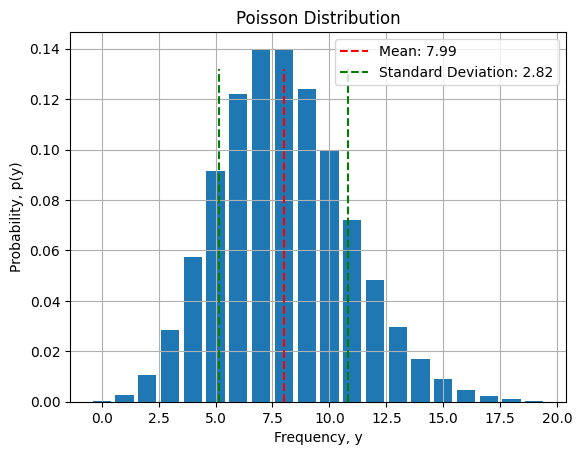

In [15]:
def calculate_poisson_probability(lmbda, frequency):
  return (np.power(lmbda, frequency) * np.power(np.e, -1 * lmbda)) / np.math.factorial(frequency)

average_probability_of_lighting_up = 8 # times in 90 seconds

frequencies = np.arange(20) # No. of times it can light up in 90 seconds
probability_of_frequency = [calculate_poisson_probability(average_probability_of_lighting_up, frequency) for frequency in frequencies]

mean = calculate_discrete_mean(frequencies, probability_of_frequency)
variance = calculate_discrete_variance(frequencies, probability_of_frequency)
standard_deviation = np.sqrt(variance)

probability_of_lighting_up_ten_times = probability_of_frequency[np.where(frequencies == 10)[0][0]]
print(f"The probability of lighting up 10 times in 90 seconds is {probability_of_lighting_up_ten_times:.2f}")

plt.figure()
plt.title("Poisson Distribution")
plt.bar(frequencies, probability_of_frequency)
plt.axvline(x = mean, ymin = 0, ymax = 0.90, linestyle='--', color='red', label = f'Mean: {mean:.2f}')
plt.axvline(x = mean + standard_deviation, ymin = 0, ymax = 0.90, linestyle='--', color='green', label = f'Standard Deviation: {standard_deviation:.2f}')
plt.axvline(x = mean - standard_deviation, ymin = 0, ymax = 0.90, linestyle='--', color='green')
plt.xlabel("Frequency, y")
plt.ylabel("Probability, p(y)")
plt.grid()
plt.legend()
plt.show()


From the mean and standard deviation given in the above graph, we can interpret that a firefly usually lights up 5-11 times in 90 seconds.

**Example**

In the above example we calculated the probability of a firefly lighting up **exactly** 10 times in 90 seconds - the result was $10\%$.

1.  Now we want to calculate the probability of the firefly lighting up **atleast** 10 times in 90 seconds.

To do that we need to sum the probability starting from the 10th frequency to infinity. In our case we have the values up to $20$. So, if we sum up all the probabiities starting from 10 up to 20, the result will be $0.28$ or $28\%$.  So, there is a probability of $28%$ that a firefly will light up atleast 10 times in 90 seconds.

2. Now we want to calculate the probability of the firefly lighting up **atmost** 10 times in 90 seconds.

To do that we need to sum the probability starting from the 0th frequency to 10. If we sum up all the probabiities starting from 0 up to 10, the result will be $0.82$ or $82\%$.  So, there is a probability of $82%$ that a firefly will light up atmost 10 times in 90 seconds.

### Mean of Poisson Distribution

The mean ($\mu$) or expected value ($E(y)$) of a Poisson distribution is as follows:

\begin{equation}
\mu = E(y) = y_0 \frac{\lambda^{y_0} e^{-\lambda}}{y_0!} + y_1 \frac{\lambda^{y_1} e^{-\lambda}}{y_1!} + ... = \lambda
\end{equation}

### Variance of Poisson Distribution

The variance ($\sigma^2$) of a Poisson Distribution is as follows:

\begin{equation}
\sigma^2 = (y_0 - \mu)^2 + (y_1 - \mu)^2 + ... = \lambda
\end{equation}

**Therefore, for a poisson distribution the mean and variance is the same which is $\lambda$**

In [16]:
mean = calculate_discrete_mean(frequencies, probability_of_frequency)
variance = calculate_discrete_variance(frequencies, probability_of_frequency)

print(f"Mean of the poisson distribution is {mean:.2f} where the value of lambda (firefly lighting up 8 times on average) is {average_probability_of_lighting_up}")
print(f"Variance of the poisson distribution is {variance:.2f} where the value of lambda (firefly lighting up 8 times on average) is {average_probability_of_lighting_up}")

Mean of the poisson distribution is 7.99 where the value of lambda (firefly lighting up 8 times on average) is 8
Variance of the poisson distribution is 7.96 where the value of lambda (firefly lighting up 8 times on average) is 8


## Continuous Distributions

In a continuous distribution the size of sample dataset (random variable inputs) ranges from $-\infty$ to $+\infty$. However, the total probability of all the samples must be equal to 1.

Generally, we know that probability of an event can be determined using the following equation:

\begin{equation}
p(y) = \frac{favorable \quad otcome}{samples \quad pace}
\end{equation}

Suppose we have an unfair coin and the probability is not 50-50. But we do not know the probability of head for that coin. Now we flip the coin 10 times and we get head 7 times. Does that mean the true probability of heads for that unfair coin is 0.7?

So, we ask the question - What is the probability that the true probability of head is 0.7 i.e. $P(P(head=0.7))$? Here we are trying to determine the probability of 'true probability of heads' of the unfair coin. Let us denote the 'true probability' of heads as 'h' i.e. $p(p(heads)=0.7)$ will called $p(h=0.7)$. We want to plot the probability distribution graph for all possible values of 'h' starting from 0 to 1.

In this scenario the probability of heads can be any value starting from 0 to 1 - the number of possible outcomes are $\infty$. Therefore, to plot the probability distribution of each probability we need to use a **continuous distribution**.

However, since the size of a sample space is $\infty$ and the number and each of the value in the sample space has a non-zero probability, in a continuous distribution, the total probability becomes:

\begin{equation}
p(h) = \frac{favorable \quad outcomes}{sample \quad space} = \frac{favorable \quad outcomes}{\infty} = 0
\end{equation}

But if the probability of each outcome is zero, the total probability of the sample space can never be 1. **So, how do we solve the problem of infinity for a continuous distribution?**

To solve this problem, the concept of **Probability Density Function (PDF)** and **Cumulative Density Function (CDF)** was introduced. For **continuous distributions** we use **Probability Density Function** instead of **Probability Distribution Function**.



## Probability Density Function

To solve the above problem, we need to change how we think about a probability dsitribution graph.

- Rather than considering the probability of each possible outcome along the x-axis, we will consider the probability for a range of values along the x-axis.

- In discrete distribution, the height or y-axis of the graph denotes the probability of a value in the x-axis. But in continuous distribution, since we are considering a range values, the area of that range will be the probability of that range.

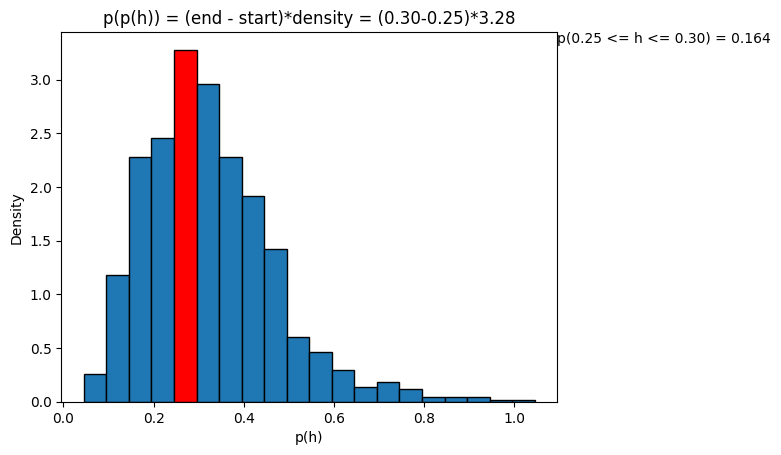

In [17]:
sample_data = np.random.chisquare(10, size=1000)
sample_data = sample_data/np.max(sample_data)
binwidth = 0.05
f, ax = plt.subplots()
n, bins, patches = ax.hist(sample_data, bins=np.arange(np.min(sample_data), np.max(sample_data) + binwidth, binwidth), density=True, edgecolor='black')

# Choose a random bin index
random_bin_index = np.random.randint(0, len(bins)-1)
# Highlight the random bin
patches[random_bin_index].set_facecolor('red')
# Calculate the probability of the random bin
bin_probability = n[random_bin_index] * np.diff(bins)[random_bin_index]
# Get the range of values for the selected bin
bin_range = (bins[random_bin_index], bins[random_bin_index + 1])

# Add text annotation with the bin range and probability
ax.text(
    1,
    1,
    f'p({bin_range[0]:.2f} <= h <= {bin_range[1]:.2f}) = {bin_probability:.3f}',
    ha='left', va='top', transform=ax.transAxes
)
ax.set_xlabel("p(h)")
ax.set_ylabel("Density")
ax.set_title(f"p(p(h)) = (end - start)*density = ({bin_range[1]:.2f}-{bin_range[0]:.2f})*{n[random_bin_index]:.2f}")
plt.show()

In the above graph, we created a plot for different ranges of p(h). You can see that the graph contains different bins. Each bin represents the probability for a range value (as the one highlighted in red). The value along the y-axis is called **Density** instead of **p(p(h))**. That is due to the fact that the value of **p(p(h))** is actually the area of the bin.

**Density is the probability per unit in the x-direction. Since the area is the probability of the range $\Delta h$**

\begin{equation}
p(h) = Density * \Delta h \\
Density = \frac{p(h)}{\Delta h}
\end{equation}

In the above graph we have computed the probability for the range of value in the selected bin by multiplying the density with the length of the bin - the formula to calculate the area of a rectangle.

Similarly, if we now calculate the probability for all the bins and add them up, we should get a probability of one.

The value of the 'Density' in the graph does not provide much information - rather the area of the bin provides us the desired probability.

This type of distribution is known as **Probability Density Distribution** and the equation to calculate the density of each bin is known as **Probability Density Function or PDF**.

As the width of each bin decreases, the range decreases and we get a more fine-grain assumption of the probability of each value within that range. If the width of the bin approaches zero, we get a smooth curve where the **area under the curve** represents the total probability of the entire sample. Since the total probability is '1' the area of the curve is 1.

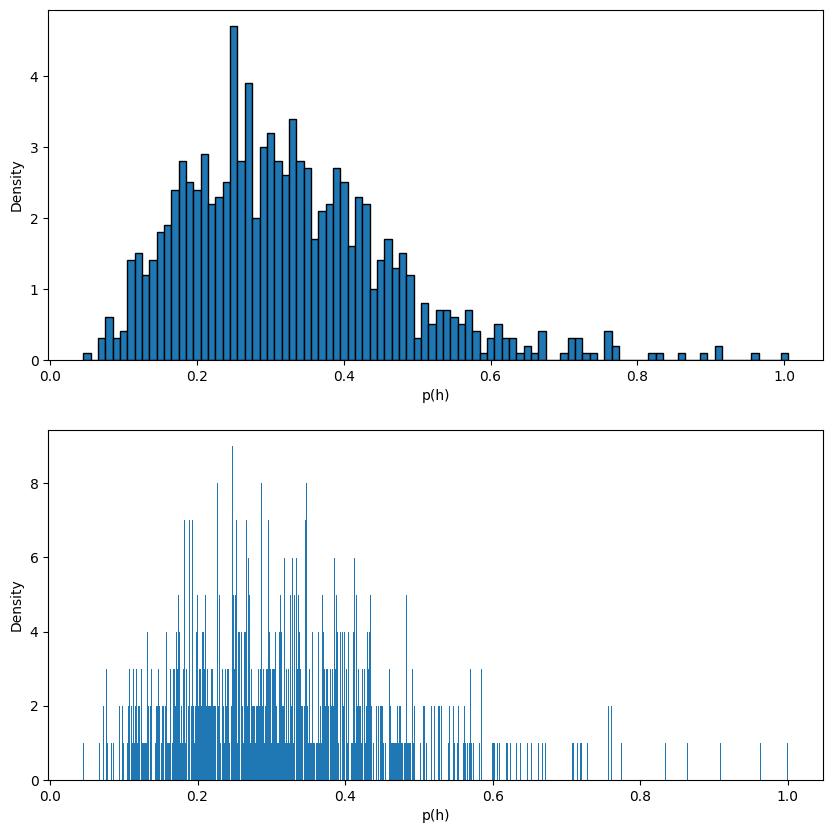

In [18]:
binwidth = 0.01
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.hist(sample_data, bins=np.arange(np.min(sample_data), np.max(sample_data) + binwidth, binwidth), density=True, edgecolor='black')
plt.xlabel("p(h)")
plt.ylabel("Density")

plt.subplot(2, 1, 2)
binwidth = 0.001
plt.hist(sample_data, bins=np.arange(np.min(sample_data), np.max(sample_data) + binwidth, binwidth), density=True)

plt.xlabel("p(h)")
plt.ylabel("Density")
plt.show()

Therefore in a continuous distribution, if we want to calculate the probability of a single outcome - we have to consider the fact that the width of a single point in the 'probability bin' is zero. Therefore, it does not make any sense to talk about the probability of a single point. Rather, we look at the probability of a range of values.

## Cumulative Distribution Function

As discussed above, the probability density function contains the probability density of a random variable along the y-axis and the area of a range under the curve gives us the probability for that range.

Suppose, for the above example we want to find the probability of heads being less than or equal to 0.7 i.e. $p(h \leq 0.7)$. We can also formulate the question as - what is the probability of heads being greater than or equal to 0 and less than or equal to 0.7 i.e. $p(0 \leq h \leq 0.7)$?.

Now we have a range but the range is not small enough. So, we cannot consider it as a rectangle to calculate the area. Therefore, in this type of scenario, to calculate the probability $P(X \leq x)$ of a random variable we use the **Cumulative Distribution Function or CDF**.

It is a function that takes a probability density function and provides the probability for the entire range of the PDF. The equation for CDF is as follows:

\begin{equation}
F(y) = \int_{-\infty}^y p(y) dy
\end{equation}

Therefore, if $y=0.7$ i.e. to get the probability of heads being less than or equal to 0.7, the equation becomes:

\begin{equation}
F(y) = \int_{0}^{0.7} p(y) dy
\end{equation}

In context of discrete calculation, we take the entire area under the curve for that range and sum it up.

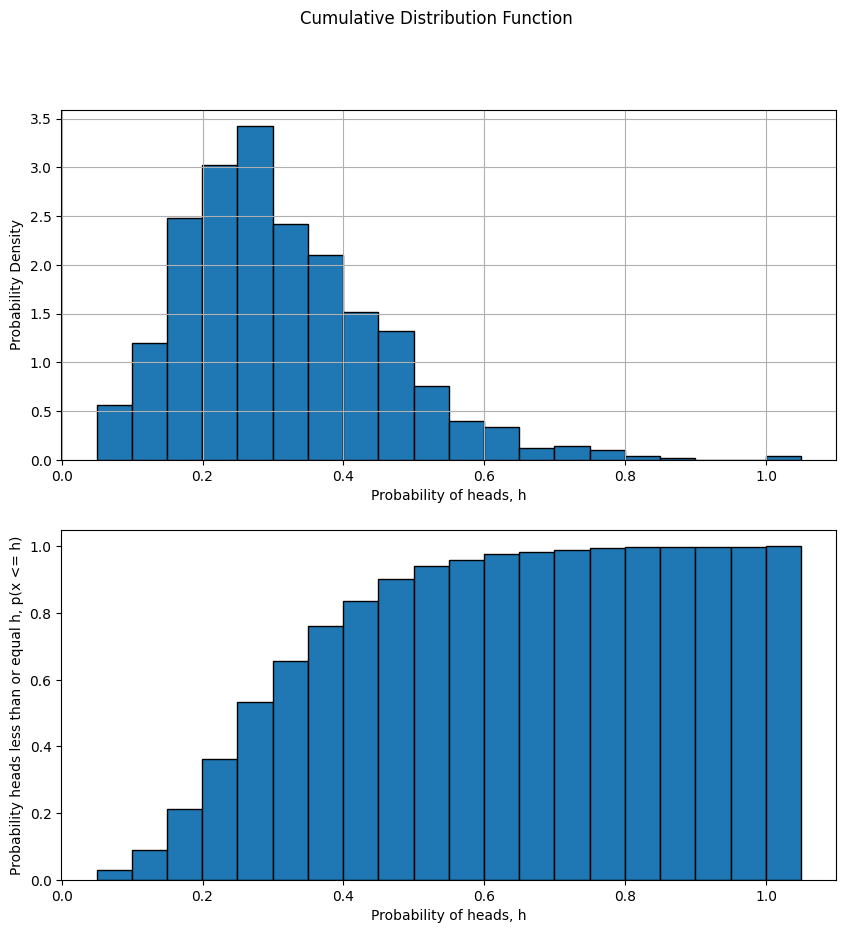

The probability of heads being less than or equal 0.7 i.e p(h <= 0.7) = 0.983


In [58]:
sample_data = np.random.chisquare(10, size=1000)
sample_data = sample_data/np.max(sample_data)
binwidth = 0.05

plt.figure(figsize=(10, 10))
plt.suptitle("Cumulative Distribution Function")
plt.subplot(2, 1, 1)
plt.hist(sample_data, bins=np.arange(np.min(sample_data), np.max(sample_data) + binwidth, binwidth), density=True, edgecolor='black', label='PDF')
plt.xlabel("Probability of heads, h")
plt.ylabel("Probability Density")
plt.grid()

plt.subplot(2, 1, 2)
n, bins, _ = plt.hist(sample_data, bins=np.arange(np.min(sample_data), np.max(sample_data) + binwidth, binwidth), cumulative=True, density=True, edgecolor='black', label='CDF')

probability_less_than_point_7 = n[np.where(bins <= 0.7)[0][-1]-1]
plt.xlabel("Probability of heads, h")
plt.ylabel("Probability heads less than or equal h, p(x <= h)")
plt.show()

print(f"The probability of heads being less than or equal 0.7 i.e p(h <= 0.7) = {probability_less_than_point_7}")

From the above graph we can see that the value of y-axis of $h=0.7$ is somewhere above 0.9 or $90\%$.

Observing the PDF we can see that most of the probability density infact lies below 0.7 and so the probability of heads being 0.7 is over $90\%$.

If we want to calculate the probability of heads being between 0.3 and 0.4 i.e. $p(0.3 \leq h \leq 0.4)$ we can use the CDF as follows:

\begin{equation}
p(0.3 \leq h \leq 0.4) = p(h \leq 0.4) - p(h \leq 0.3)
\end{equation}

If we calculate $p(h \leq 0.4)$ and $p(h \leq 0.3)$. Then if we subtract the second value from the first we will get the value within the range 0.3 and 0.4.

In this way we can find the probability for a range if we know the CDF of the distribution.

## Normal Distribution

A Normal distribution is defined as follows:

\begin{equation}
X \sim N(\mu, \sigma^2)
\end{equation}

It states that the variable 'X' follows a normal distribution with a mean $\mu$ and a variance $\sigma^2$.

When dealing with actual data, we will usually know the value mean and the variance of the normal distribution. Most of the distribution that is found in nature is normally distributed.

### Characteristics of a graph of normal distribution

- The graph of a normal distribution is bell shaped. Therefore, majority of the data is centred around the mean of the data points. Thus values further away from the mean are less likely to occur.

- The graph is symmetric around the mean. Therefore, the values both to the left and the right of the mean, at the same distance from the mean is equally likely i.e. $p(\mu - \sigma) = p(\mu + \sigma)$.


### Equation of the probability Density Function

As discussed earlier, $p(y)$ is generally a function where we provide a value 'y' and in return we get the probability density of that value. In continuous distribution it is also denoted by $f(y)$. The function that generates a probability for a set of outcomes is known as a **Probability density Function (PDF)**. The PDF of normal distribution is as follows:

\begin{equation}
p(y) = f(y) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(y-\mu)^2}{2\sigma^2}}
\end{equation}

### Equation of Expected value

The expected value E(y) of a normal distribution is equal to the mean of the distribution i.e.

\begin{equation}
E(y) = \mu
\end{equation}

### Equation of Variance

The variance of a normal distribution is equal to the difference between the expected value of the squared random variable and the square of the expected value of the random variable i.e.

\begin{equation}
Var(Y) = \sigma^2 = E(Y^2) - E(Y)^2
\end{equation}



In [19]:
def calculate_pdf_normal_distribution(outcome, standard_deviation, mean):
  exp = (-1 * np.square(outcome - mean) )/(2 * np.square(standard_deviation))
  return np.power(np.e, exp)/ (standard_deviation * np.sqrt(2 * np.pi))

### Example

We know that the average weight of a fully grown lion is from 150kg to 250kg. There are lions that weight less than 150kg or more than 250kg but they are rare and hence, in statistics these type of data are known as **outliers**.

We can calculate the **mean** weight of the lion from the above example by calculating the average of the weight range that we know. Therefore,

\begin{equation}
\mu_{weight} = \frac{150+250}{2} = 200
\end{equation}

So, the mean weight or expected value of the weight of a lion is 200kg.

We can now calculate the variance of the distribution from the mean using the formula to calculate the variance i.e.

\begin{equation}
\sigma_{weight}^2 = E(Y^2) - (E(Y))^2
\end{equation}

But without knowing the value of $E(Y^2)$ we cannot calculate the variance. However, if we assume that the weight of a lion follows a symmetric normal distribution, we can calculate the standard deviation $\sigma$.

Since the range provided is 150 to 250, we can assume that the standard deviation is half the range, i.e., $\frac{250 - 150}{2} = 50$.

Therefore, the variance $\sigma^2 = 50^2 = 2500$.

Now, we can plot the normal distribution of probability density of weight of a full grown lion.

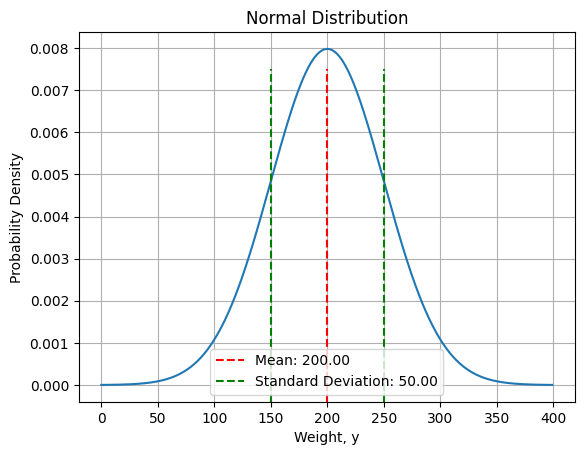

In [20]:
weight_range_start = 150
weight_range_end = 250

mean_weight = (weight_range_start + weight_range_end)/2
standard_deviation_weight = (weight_range_end - weight_range_start)/2

weights = np.arange(0, 400)
probabilities = [calculate_pdf_normal_distribution(weight, standard_deviation_weight, mean_weight) for weight in weights]

plt.figure()
plt.title("Normal Distribution")
plt.plot(weights, probabilities)
plt.axvline(x = mean_weight, ymin = 0, ymax = 0.90, linestyle='--', color='red', label = f'Mean: {mean_weight:.2f}')
plt.axvline(x = mean_weight - standard_deviation_weight, ymin = 0, ymax = 0.90, linestyle='--', color='green', label = f'Standard Deviation: {standard_deviation_weight:.2f}')
plt.axvline(x = mean_weight + standard_deviation_weight, ymin = 0, ymax = 0.90, linestyle='--', color='green')

plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()
plt.show()

**If continuous distribution provides probability for a range, how are we able to get the probability for individual weight?**

We discussed earlier that a continuous distribution cannot provide probability for a single value - rather it provides the probability for a range of values. But in the above example, we are getting the probability of a single weight. How is that possible?

To answer this question we need to take a closer look at the distribution that we just plotted.

The distribution contains integer values starting from 0-400 which represents the weight in kilograms. If the sum of probabilities of all the weights that we just provided equal to one, is there no possibility that a lion can weight 200.1 kg or 200.2?

Let us find out the probability of a lion weighing 200.1 kg.

In [21]:
total_probability = np.sum(probabilities)
print(f"The total probability of the distribution 0-400 kg (integers only) is {total_probability:.2f}")

print(f"Probability of weight being 200kg, p(200)={calculate_pdf_normal_distribution(200, standard_deviation_weight, mean_weight)}")
print(f"Probability of weight being 200.1kg, p(200.1)={calculate_pdf_normal_distribution(200.1, standard_deviation_weight, mean_weight)}")
print(f"Probability of weight being 2001kg, p(201)={calculate_pdf_normal_distribution(201, standard_deviation_weight, mean_weight)}")

The total probability of the distribution 0-400 kg (integers only) is 1.00
Probability of weight being 200kg, p(200)=0.007978845608028654
Probability of weight being 200.1kg, p(200.1)=0.007978829650353396
Probability of weight being 2001kg, p(201)=0.007977249998473324


If the total probability is 1 for all integer weights, how can $p(h=200.1)$ be non-zero? We know that the total probability cannot be greater than 1. To answer this, let us plot the probability of weight between 200 to 201.

Total probability of the fraction values: 7.9783145144408465


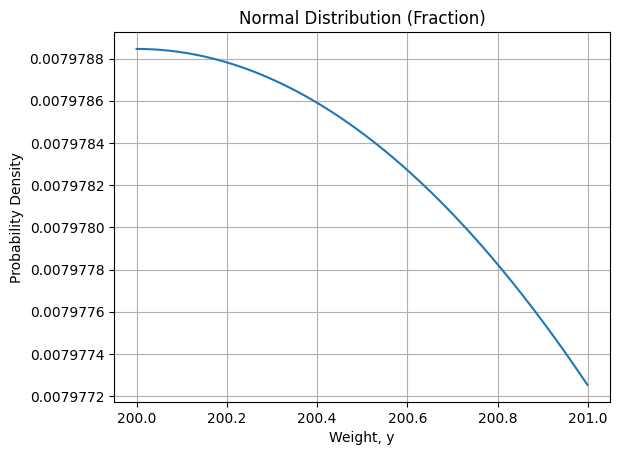

In [22]:
weights_fraction = np.arange(200, 201, 0.001)
probabilities_fraction = [calculate_pdf_normal_distribution(weight, standard_deviation_weight, mean_weight) for weight in weights_fraction]

print(f"Total probability of the fraction values: {np.sum(probabilities_fraction)}")
plt.figure()
plt.title("Normal Distribution (Fraction)")
plt.plot(weights_fraction, probabilities_fraction)

plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.show()

All the values between the range 200 and 201 has non-zero probabilities. The probability of $p(200)$ and $p(201)$ is the same as what we got in the first graph. Furthermore, the total probability of this portion of the graph is showing as 7.98 which is not possible as probability cannot be greater than 1.

So, you can see that this curve is just a small portion of the first graph. **This graph is not a discrete distribution - rather a continuous distribution**. The y-axis of the graph is the density - not probability.

That is why we did not plot this graph as a bar chart - rather a line chart. It indicates that there are infinite values between any two corresponding values and the probability of those points are non-zero.

**Solution**

The reason behind the above scenario is that - we are plotting probability density along the y-axis and not the probability of that weight iteself. The total sum of probability density in a continuous distribution can be greater than 1.

Therefore, we cannot find the probability of a single weight for the above scenario. What we can do is **find the probability for a range of values within the graph**.

**So, we can say that the probability of the weight of a lion being 200-201 kg is equal to the area of the segment between the two values.**

But since the probability density between the two range does not change linearly, we get a curved line in the plot. So, the segment is actually not a rectangle.

**Area under the curve (Calculus)**

One way to calculate the exact area is to use calculus and find the area under the curve between the two regions. The equation for that is:

\begin{equation}
Area = \int_a^b f(y)
\end{equation}

Here,
- 'a' is the lower limit of the 'x-value'
- 'b' is upper limit of the 'x-value'
- 'f(y)' is the equation of the curve

Since, we considered our distribution to be a normal distribution we know the equation for $f(y)$ which is the equation of its probability density function. If we solve the equation we get:

\begin{equation}
\int_a^b f(y) = \int_{200}^{201} \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(y-\mu)^2}{2\sigma^2}} \approx 0.007978...
\end{equation}

Since this is a complex integration (Gaussian integral or the error function integral) we will not go through all the steps and instead use a scipy package to find the result given below.

In [23]:
def integrand(y): # Equation for normal distribution where 50 is the sigma we got above and 200 is the mean
  return (1 / (50 * ((2 * np.pi) ** 0.5))) * np.power(np.e, -((y - 200) ** 2) / (2 * 50 ** 2))

intergration_result, err = spi.quad(integrand, 200, 201)
print(f"The probability (using calculus) of the weight being 200 and 201 is {intergration_result} and the error is {err}")

The probability (using calculus) of the weight being 200 and 201 is 0.007978313716901981 and the error is 8.857707586187293e-17


But if we did not know the equation of the curve, it would be even more difficult to compute the integration.

**Calculate using Cumulative Density Function**

One easy way is to calculate the CDF of the distribution and find the probability of the range from the CDF. But we need to know the equation of CDF of the distribution.

**Approximation using rectangle and right-angled triangle**

Therefore, another simpler approach is to consider the section of the curve as a long rectangle, but the top is a little curved. Since the rectangle is very thin we can consider the curve as a straight line. Then we can divide the entire segment into a rectangle and a right-angled triangle. Finally we can calculate the area of both and add them up to get an approximate value.

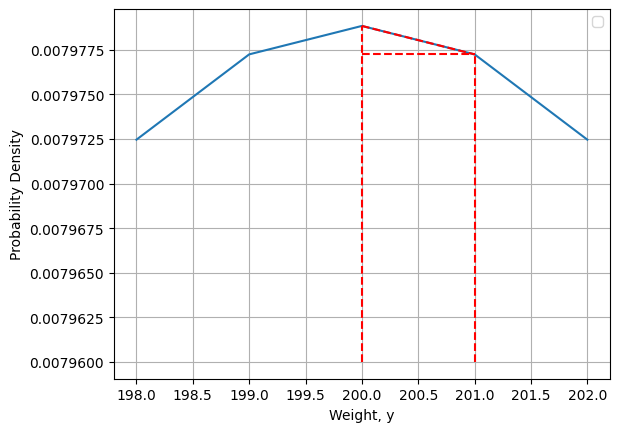

In [24]:
weight_range_start = 150
weight_range_end = 250

mean_weight = (weight_range_start + weight_range_end)/2
standard_deviation_weight = (weight_range_end - weight_range_start)/2

weights = np.arange(198, 203)
probabilities = [calculate_pdf_normal_distribution(weight, standard_deviation_weight, mean_weight) for weight in weights]

prob_200 = calculate_pdf_normal_distribution(200, standard_deviation_weight, mean_weight)
prob_201 = calculate_pdf_normal_distribution(201, standard_deviation_weight, mean_weight)

plt.figure()
plt.plot(weights, probabilities)
plt.plot([200, 200], [0.00796, prob_200], linestyle='--', color='red')
plt.plot([201, 201], [0.00796, prob_201], linestyle='--', color='red')
plt.plot([200, 201], [np.min([prob_200, prob_201])]*2, linestyle='--', color='red')
plt.plot([200, 201], [prob_200, prob_201], linestyle='--', color='red')

plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()
plt.show()

This provides us with the following equation where the first part is the area of a rectangle and the second part is the area of a triangle.
\begin{equation}
p(200-201) \approx Area_{reactangle} + Area_{Triangle} \\
p(200-201) \approx ( width_{rectangle} * height_{rectangle} ) + (\frac{1}{2} * width_{traingle} * height_{triangle}) \\
p(200-201) \approx (201-200) * Density(201) + (\frac{1}{2} * (201-200) * absolute(Density(200) - Density(201)) \\
p(200-201) \approx 0.007978...
\end{equation}

We can see that this approach is simpler and provides a very good approximation and is very close to the result that we obtained using calculus.

In [25]:
prob_density_200 = calculate_pdf_normal_distribution(200, standard_deviation_weight, mean_weight)
prob_density_201 = calculate_pdf_normal_distribution(201, standard_deviation_weight, mean_weight)

diff_prob_density = np.abs(prob_density_201 - prob_density_200)

area_of_rectange = (201-200) * np.min([prob_density_200, prob_density_201])

area_of_triangle = (1/2) * (201-200) * diff_prob_density

prob_200_to_201 = area_of_rectange + area_of_triangle

print(f"The probability that a fully grown lion weights between 200 and 201 kg is {prob_200_to_201}")


The probability that a fully grown lion weights between 200 and 201 kg is 0.007978047803250989


### Summary

Therefore, we can conclude from the above example that for a continuous distribution:

- The PDF provides a probability density instead of a probability.

- We can only compute the probability for a range of value within the curve.

- We need to compute the area under the curve to get the probability of a range.

- It is not always easy to use calculus to estimate the area under a curve. So, an approximation using a rectangle and a triangle is good enough as long as the range is very small and the curve can be considered a straight line.

- As the range decreases our approximation of the probability becomes more and more accurate.

- There is around $7\%$ chance that a fully grown male lion weighs between 200 and 201 kilograms.


**Note**

In the next following section we will discuss a few more type of continuous distribution. In those distributions, if we say **probability distribution** we actually mean **probability density distribution**. If we do not compute the probability of a range explicitly using the area under the curve, even if we say probability - what we actually mean is probability density.

## Transformation

It is a process by which we can alter every element of a distribution to get a new distribution with similar characteristics.

For **normal distribution** we can use addition. subtraction, multiplication, and division without changing the type of distribution. But we must perform the same operation on all elements along the **x-axis** of the distribution and then **re-calculate the probability densities** for the new outcome. Finally we plot the graph of the new outcome vs the new probability densities.

**Addition**

If we add a number to all the elements of a normal distribution, the graph shifts to the right.

**Subtraction**

If we subtract a number from all the elements of a normal distribution, the graph shifts to the left.

**Multiplication**

If we multiply a number with all the elements of a normal distribution, the graph spreads out.

**Division**

If we divide all the elements of a normal distribution by a number greater than one, the graph becomes narrow i.e. concentrated at the centre. If we divide it by a number between 0 and 1, the graph spreads out since we are technically multiplying it.

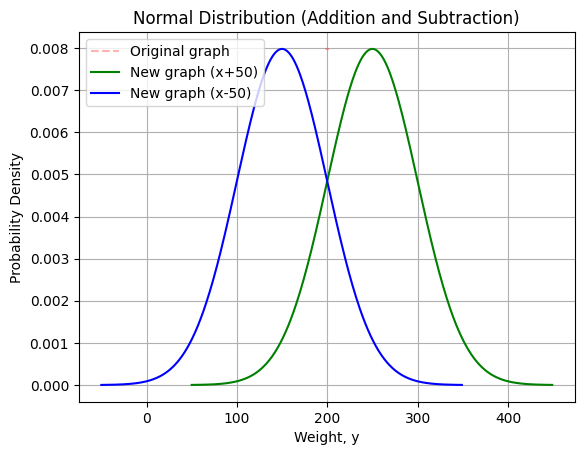

In [26]:
# Addition
added_constant = 50
added_weight_range_start = weight_range_start + added_constant
added_weight_range_end = weight_range_end + added_constant

added_mean_weight = (added_weight_range_start + added_weight_range_end)/2
added_standard_deviation_weight = (added_weight_range_end - added_weight_range_start)/2

added_weights = np.arange(0+added_constant, 400+added_constant)
added_probabilities = [calculate_pdf_normal_distribution(weight, added_standard_deviation_weight, added_mean_weight) for weight in added_weights]

# Subtraction
subtracted_constant = 50
subtracted_weight_range_start = weight_range_start - added_constant
subtracted_weight_range_end = weight_range_end - added_constant

subtracted_mean_weight = (subtracted_weight_range_start + subtracted_weight_range_end)/2
subtracted_standard_deviation_weight = (subtracted_weight_range_end - subtracted_weight_range_start)/2

subtracted_weights = np.arange(0-subtracted_constant, 400-subtracted_constant)
subtracted_probabilities = [calculate_pdf_normal_distribution(weight, subtracted_standard_deviation_weight, subtracted_mean_weight) for weight in subtracted_weights]


# Plot
plt.figure()
plt.title("Normal Distribution (Addition and Subtraction)")
plt.plot(weights, probabilities, alpha=0.3, color='red', label='Original graph', linestyle='--')

plt.plot(added_weights, added_probabilities, color='green', label=f'New graph (x+{added_constant})')
plt.plot(subtracted_weights, subtracted_probabilities, color='blue', label=f'New graph (x-{subtracted_constant})')

plt.grid()
plt.legend()
plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.show()

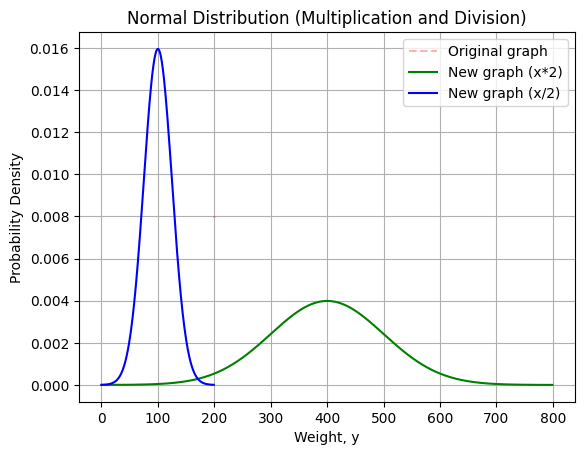

In [27]:
# Multiplication
added_constant = 2
added_weight_range_start = weight_range_start * added_constant
added_weight_range_end = weight_range_end * added_constant

added_mean_weight = (added_weight_range_start + added_weight_range_end)/2
added_standard_deviation_weight = (added_weight_range_end - added_weight_range_start)/2

added_weights = np.arange(0, 400*added_constant)
added_probabilities = [calculate_pdf_normal_distribution(weight, added_standard_deviation_weight, added_mean_weight) for weight in added_weights]

# Division
subtracted_constant = 2
subtracted_weight_range_start = weight_range_start / added_constant
subtracted_weight_range_end = weight_range_end / added_constant

subtracted_mean_weight = (subtracted_weight_range_start + subtracted_weight_range_end)/2
subtracted_standard_deviation_weight = (subtracted_weight_range_end - subtracted_weight_range_start)/2

subtracted_weights = np.arange(0, 400/subtracted_constant)
subtracted_probabilities = [calculate_pdf_normal_distribution(weight, subtracted_standard_deviation_weight, subtracted_mean_weight) for weight in subtracted_weights]


# Plot
plt.figure()
plt.title("Normal Distribution (Multiplication and Division)")
plt.plot(weights, probabilities, alpha=0.3, color='red', label='Original graph', linestyle='--')

plt.plot(added_weights, added_probabilities, color='green', label=f'New graph (x*{added_constant})')
plt.plot(subtracted_weights, subtracted_probabilities, color='blue', label=f'New graph (x/{subtracted_constant})')

plt.grid()
plt.legend()
plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.show()

## Standard Normal Distribution

Standardization of a **normal ditribution** is the process by which we apply certain **transformations** to the graph so that the **mean or expected value becomes zero** and **variance becomes 1**.

The distribution that we get after standardizing a normal distribution, is known as **Standard Normal Distribution**.

The equation of Standard Normal Distribution is as follows:

\begin{equation}
Z \sim N(0, 1)
\end{equation}

A **table** already exists that contains the information related to the **Cumulative Distribution Function (CDF)** of a **Standard Normal Distribution**. This table is known as the **Standard Normal Distribution Table** or the **Z-Score Table**. Therefore, if we convert a normal distribution to a standard normal distribution, we can perform a better analysis and do not have to re-calculate the CDF.

### Transforming a normal distribution to a standard normal distribution

**1. Converting the mean to zero**

First we move the graph to the left or to the right until the mean becomes zero. We can do this by subtracting the mean $\mu$ from every element (i.e. outcome along x-axis).

**2. Convert the standard deviation to one**

We scale the graph so that the standard deviation becomes one. We can do this by dividing all elements (i.e. outcome along x-axis) of the distribution by the original standard deviation $\sigma$.

**3. Re-calculate probability Densities**

Finally we re-calculate the probability densities with our new outcome, provide the mean as zero and standard deviation as one.

The equation for the transformation of a normal distribution to a standard normal distribution is as follows:

\begin{equation}
y = f(\frac{x - \mu}{\sigma})
\end{equation}

<ipython-input-28-31da5abe2f23>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


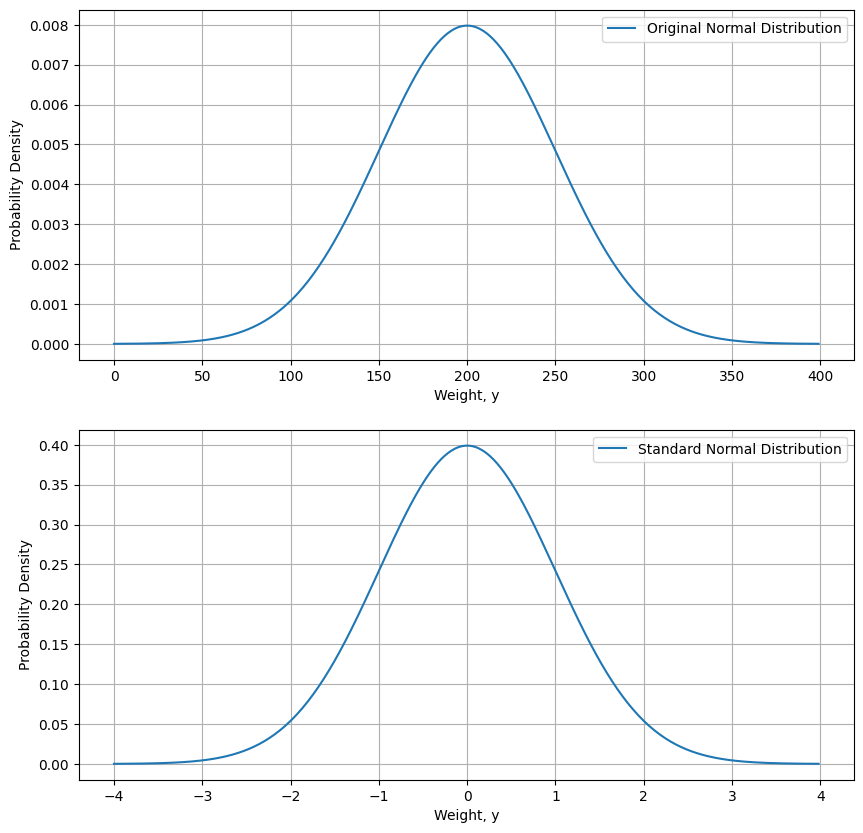

In [28]:
def convert_normal_to_standard_normal(outcomes, mean, standard_deviation):
  return (np.array(outcomes) - mean)/standard_deviation


weight_range_start = 150
weight_range_end = 250

mean_weight = (weight_range_start + weight_range_end)/2
standard_deviation_weight = (weight_range_end - weight_range_start)/2

weights = np.arange(0, 400)
probabilities = [calculate_pdf_normal_distribution(weight, standard_deviation_weight, mean_weight) for weight in weights]

# Apply transformation
standard_normal_weights = convert_normal_to_standard_normal(weights, mean_weight, standard_deviation_weight)
standard_normal_mean = 0
standard_normal_deviation = 1
standard_normal_probabilities = [calculate_pdf_normal_distribution(weight, standard_normal_deviation, standard_normal_mean) for weight in standard_normal_weights]


plt.figure(figsize=(10, 10))
plt.title("Standard Normal Distibution")

plt.subplot(2, 1, 1)
plt.plot(weights, probabilities, label='Original Normal Distribution')
plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(standard_normal_weights, standard_normal_probabilities, label='Standard Normal Distribution')
plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()

plt.show()




**Note:**

We cannot always anticipate that a set of data has a normal distribution. To assume a normal distribution, we need a lot of data. If we have limited data, the outliers drastically affect our analysis. Usually if we have less than 30 entries, we avoid using a normal distribution.

**When we have less data and we know that if we had more data the distribution would be a normal distribution - in that case we use a variation of the normal distribution which is known as Student's T-Distribtion.**

## Student's T Distribution

When a population of data has a normal distribution but we have a very small sample to work with - in that case if we use a normal distribution the outliers will affect our analysis. So, for a small sample that follows a normal distribution, we use a Student's T Distribution.

The equation for Student's T Distribution is as follows:

\begin{equation}
X \sim t(k)
\end{equation}

The above equation states that - 'X' follows a Student's T Distribution with 'k' degrees of freedom.

For example, the average lap time of an entire season of a formula one race follows a normal distribution. However, the average lap time of a single lap of a single race follows a Student's T Distribution.

***Degrees of Freedom, k***

In a Student's T Distribution, degree of freedom represent the number of independent pieces of information available in the sample. It is typically denoted by the symbol $\nu$ or $k$.

For example, **if you have a sample of size "n" from a population and you want to estimate the population mean using the t-distribution, the degrees of freedom (k) for that distribution would be (n - 1)**. This is because when estimating the population mean, one degree of freedom is used to estimate the sample mean ($\mu$), leaving (n - 1) degrees of freedom.

**Characteristics**

- Like normal distribution, this distribution also has a bell shaped curved and is centred around the mean.

- Unlike normal distribution, the graph has fatter tails to account for the outliers. We trim both the tails of the graph to remove the outliers. Because if we have a small sample and a big portion of that data is outlier, the outliers will bias the probabilities that we calculate for the outcomes.

- Usually T distribution is useful when the sample size is less than or equal to 30. As the sample size increases it becomes more and more like the normal distribution.

- Like a normal distribution it is defined using mean and variance. However, it has an additional characteristic which - **degrees of freedom (k)**.

- As long as 'k' is greater than 2, the expected value $E(Y)$ is equal to the mean $\mu$ of the distribution.

- The variance of the sample is equal to:

\begin{equation}
\sigma^2 = \frac{s^2 . k}{k - 2}
\end{equation}

Here,

- $k$ = degrees of freedom where $k > 2$
- $s^2$ = Variance of the sample for which we plot the T distribution
- $\sigma^2$ = Variance of the T distribution

The value of $s^2$ can be calculated using the following equation:

\begin{equation}
s^2 = \frac{\sum_{i=0}^n (y_i - \mu)^2}{n - \delta_k}
\end{equation}

Here,

- 'n' is the total sample size (not population size)
- $y_i$ is each value of the sample
- $\mu$ is the sample mean
- $\delta_k$ is the delta degree of freedom which is usually equal to 1 so that the degree of freedome becomes (n-1).
- $s^2$ is the sample variance

Usually we set $\delta_k$ equal to 1. By setting it to 1,  we are using the unbiased estimator for the sample standard deviation, which corrects for the bias that occurs when estimating the population standard deviation from a sample. It adjusts the calculation by dividing the sum of squared differences by $n - 1$ instead of $n$, which leads to a slightly larger estimate of the sample standard deviation.

**Applications**

- Frequently used in statistical analysis.
- Hypothesis testing with limited data.
- It also has a standard CDF table which is known as **T-table**.


### Equation of Probability Density Function**

The equation to calculate the probability density function of a T-Distribution is as follows:

\begin{equation}
p(y) = \frac{\Gamma(\frac{k+1}{2})}{\Gamma(\frac{k}{2}) \sqrt{\pi k}}(1 + \frac{y^2}{k})^{-\frac{k+1}{2}}
\end{equation}

Here,

- 'y' is each sample for which we want to calculate the probability
- 'k' is the degree of freedom usually equal to (n-1)
- $\pi$ is a pi (a constant)
- $\Gamma(x)$ is a function that extends the concept of factorial to real and complex numbers.

### Equation of Expected Value

As long as 'k' is greater than 2, the expected value $E(Y)$ is equal to the mean $\mu$ of the distribution.

\begin{equation}
E(Y) = \mu, k \geq 2
\end{equation}

### Equation of variance

The variance of the sample is equal to:

\begin{equation}
\sigma^2 = \frac{s^2 . k}{k - 2}
\end{equation}

where,

\begin{equation}
s^2 = \frac{\sum_{i=0}^n (y_i - \mu)^2}{n - \delta_k}
\end{equation}

Here,

- 'n' is the total sample size (not population size)
- $y_i$ is each value of the sample
- $\mu$ is the sample mean
- $\delta_k$ is the delta degree of freedom which is usually equal to 1 so that the degree of freedome becomes (n-1).
- $s^2$ is the sample variance

In [29]:
def calculate_variance_using_bessel_correction(samples, delta_degree_of_freedom):
  sample_size = len(samples)
  if delta_degree_of_freedom >= sample_size:
    raise ValueError("Delta degree of freedom must be less than the sample size")

  mean = np.sum(samples)/sample_size

  return np.sum( np.square(np.array(samples) - mean) )/(sample_size - delta_degree_of_freedom)

def calculate_variance_t_distribution(samples, degrees_of_freedom):
  if degrees_of_freedom <= 2:
    raise ValueError("The degrees of freedom must be greater than 2")

  if degrees_of_freedom > len(samples):
    raise ValueError("The degrees of freedom must be less than the sample size")

  s_square = calculate_variance_using_bessel_correction(samples, delta_degree_of_freedom=len(samples) - degrees_of_freedom)
  return (s_square * degrees_of_freedom) / (degrees_of_freedom - 2)


def calculate_pdf_t_distribution(samples, sample_mean, sample_standard_deviation, degrees_of_freedom):
  return t.pdf(samples, df=degrees_of_freedom, loc=sample_mean, scale=sample_standard_deviation)

**Example**

Let us consider the example we used in the normal distribution - weight of a fully grown male lion.

- We considered a weight range of 150-250 kg.
- We then calculated the mean from that range.
- Next, we calculated the standard deviation assuming that the distribution is a symmetric normal distribution.
- Finally we plotted the normal distribution graph.


Now let us assume that the graph and the data that we have is for the entire population. Therefore, we will collect a random sample of weights from the entire population data and try to plot the graph as a T-distribution.

We can then observe how accurate the T-distribution plot (using sample data) is compared to the original normal distribution (using population data).

**Steps to calculate T-Distribution**

- We obtain a random sample from the entire population data. Here, the population data is the weight of the lion. We will call this the sample data.

- We calculate the mean $\mu$ of the sample data. In this case, since we do not have a range like '150-250', and also since we do not have probability of each sample we cannot compute the mean using the 'sum of weighted average' method. So, we will simply compute the average of all the sample weights and use this as the mean.

- We calculate the variance of the sample data using the equation for variance the degree of freedom $k$ as (n-1) where 'n' is the size of the sample dataset.

- Next we will calculate the probability density of each weight in the population data. We can use the sample weights to plot the data but we will use population weight for now to make a comparison. **Since the equation includes Gamma function, we will use a Scipy package to calculate the probability density function**.

- We plot both the graphs - normal distribution obtained using population data and T-Distribution obtained using sample data.

Sample Mean: 195.61 and Standard Deviation: 55.07, Population Mean: 200.00 and Standard Deviation: 50.00


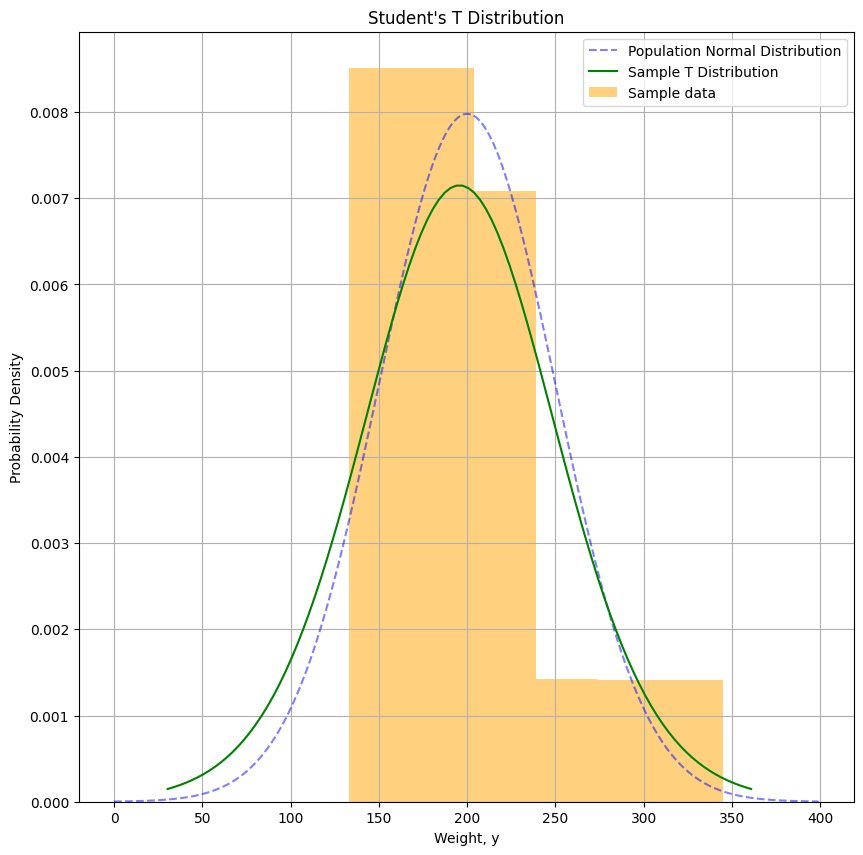

In [30]:
# Population data for weight of a fully grown male lion

weight_range_start = 150
weight_range_end = 250

population_mean_weight = (weight_range_start + weight_range_end)/2
population_standard_deviation_weight = (weight_range_end - weight_range_start)/2

population_weights = np.arange(0, 400)
population_probabilities = [calculate_pdf_normal_distribution(weight, population_standard_deviation_weight, population_mean_weight) for weight in population_weights]


# Collect a small sample from the population data
sample_size = 20
sample_weights = np.random.normal(loc=population_mean_weight, scale=population_standard_deviation_weight, size=sample_size)

# Calculate the mean and standard deviation of the sample
sample_mean = np.sum(sample_weights)/len(sample_weights)
sample_variance = calculate_variance_t_distribution(sample_weights, degrees_of_freedom=sample_size-1)
sample_standard_deviation = np.sqrt(sample_variance)

# Calculate the probability for each weight
x = np.linspace(sample_mean - 3 * sample_standard_deviation, sample_mean + 3 * sample_standard_deviation,  100)
sample_probabilities = calculate_pdf_t_distribution(x, sample_mean, sample_standard_deviation, sample_size-1)

print(f"Sample Mean: {sample_mean:.2f} and Standard Deviation: {sample_standard_deviation:.2f}, Population Mean: {population_mean_weight:.2f} and Standard Deviation: {population_standard_deviation_weight:.2f}")
plt.figure(figsize=(10, 10))
plt.title("Student's T Distribution")

plt.plot(population_weights, population_probabilities, label='Population Normal Distribution', alpha=0.5, linestyle='--', color='blue')
plt.plot(x, sample_probabilities, label='Sample T Distribution', color='green')
plt.hist(sample_weights, bins='auto', density=True, alpha=0.5, label='Sample data', color='orange')
plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()

plt.show()

We can see from the above graph that T-Distribution is a good approximation of the normal distribution even though we collected a small sample (20) from the entire population of 400.

As the sample size increases the T-Distribution approaches the normal distribution. Usually if the sample size is greater than 30, the T-Distribution becomes very similar to the normal distribution.

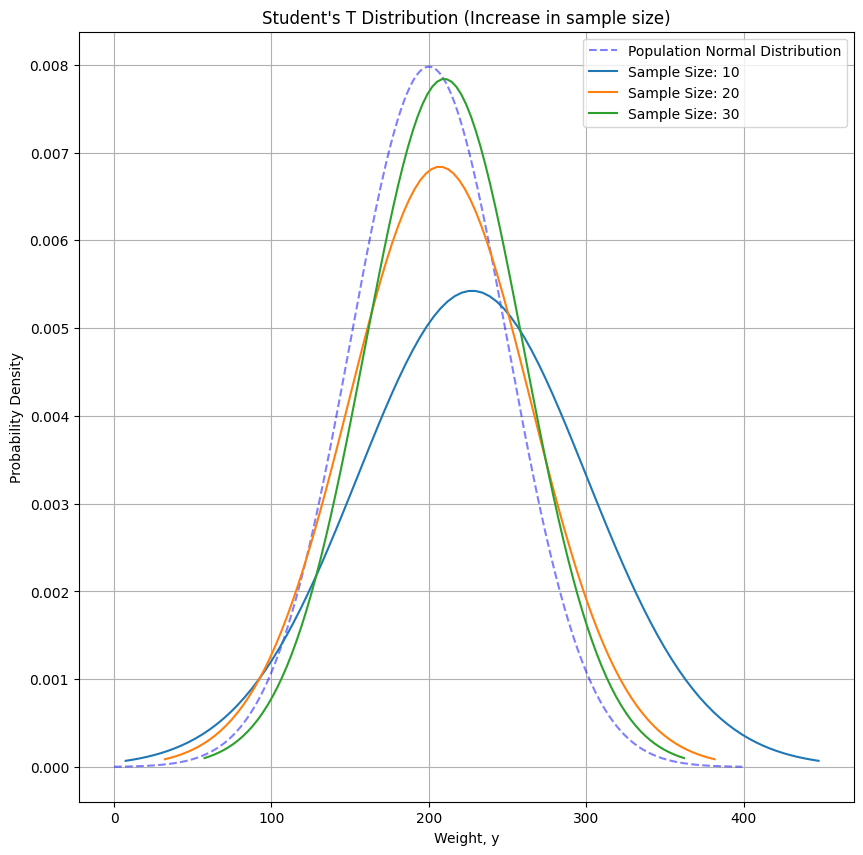

In [31]:
# Population data for weight of a fully grown male lion

weight_range_start = 150
weight_range_end = 250

population_mean_weight = (weight_range_start + weight_range_end)/2
population_standard_deviation_weight = (weight_range_end - weight_range_start)/2

population_weights = np.arange(0, 400)
population_probabilities = [calculate_pdf_normal_distribution(weight, population_standard_deviation_weight, population_mean_weight) for weight in population_weights]

sample_sizes = np.arange(10, 35, 10)

plt.figure(figsize=(10, 10))
plt.title("Student's T Distribution (Increase in sample size)")

plt.plot(population_weights, population_probabilities, label='Population Normal Distribution', alpha=0.5, linestyle='--', color='blue')

for sample_size  in sample_sizes:
  sample_weights = np.random.normal(loc=population_mean_weight, scale=population_standard_deviation_weight, size=sample_size)

  # Calculate the mean and standard deviation of the sample
  sample_mean = np.sum(sample_weights)/len(sample_weights)
  sample_variance = calculate_variance_t_distribution(sample_weights, degrees_of_freedom=sample_size-1)
  sample_standard_deviation = np.sqrt(sample_variance)

  # Calculate the probability for each weight
  x = np.linspace(sample_mean - 3 * sample_standard_deviation, sample_mean + 3 * sample_standard_deviation, 100)
  sample_probabilities = calculate_pdf_t_distribution(x, sample_mean, sample_standard_deviation, x.size-1)

  plt.plot(x, sample_probabilities, label=f'Sample Size: {sample_size}')

plt.xlabel("Weight, y")
plt.ylabel("Probability Density")
plt.grid()
plt.legend()

plt.show()

## Chi-Squared Distribution

The Chi-Squared Distribution is defined as:

\begin{equation}
X \sim \chi^2(k)
\end{equation}

It states that 'X' follows a Chi-Squared Distribution with 'k' degrees of freedom.

Very few events in real life follow a Chi-Squared Distribution. It is often used in statistical analysis for:

- Hypothesis testing
- Computing confidence intervals
- Computing 'Goodness of fit' of categorical values.

Elevating the Student's T Distribution to the second power (squating the T-Distribution) gives us a Chi-Squared Distribution.

\begin{equation}
X \sim t(k) \\
X^2 \sim \chi^2(k)
\end{equation}

Similarly the square root of a Chi-Distribution gives us a T Distribution.

**It also contains a table of known values - like Standard Normal Distribution and Student's T Distribution.**

### Equation of Expected value
The expected value (E(x)) or mean $\mu$ of a Chi-Squared Distribution is equal to 'k', its degrees of freedom.

\begin{equation}
E(Y) = k
\end{equation}

### Equation of Variance
The variance of this distribution is equal to two times the degrees of freedom or $2k$.

\begin{equation}
Var(Y) = 2k
\end{equation}

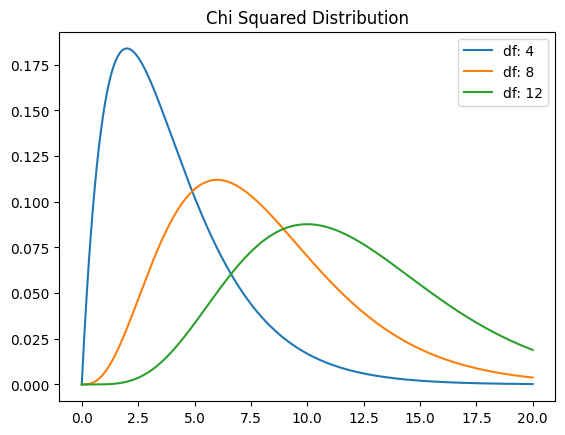

In [32]:
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)


plt.figure()
plt.title("Chi Squared Distribution")

#define multiple Chi-square distributions
plt.plot(x, chi2.pdf(x, df=4), label='df: 4')
plt.plot(x, chi2.pdf(x, df=8), label='df: 8')
plt.plot(x, chi2.pdf(x, df=12), label='df: 12')

#add legend to plot
plt.legend()

plt.show()

## Exponential Distribution

It is defined as follows:

\begin{equation}
X \sim Exp(\lambda)
\end{equation}

It states that 'X' follows an exponentital distribution with a scale factor of $\lambda$.

The scale factor $\lambda$ determines how spread out the curve is and how fast it plateus. As the value of $\lambda$ increases the curve decays at a faster rate. It is also known as the **rate parameter**.

The following type of variables follow an exponentital distribution:

1. The probability density starts of high.

2. It initially decreases fast.

3. Eventually plateus as it progresses.

For example, the number of new views per day for a popular YouTube video follows an exponentital distribution. When the content is first released the number of new views peak. After that, the number of new views start decreasing as the number of days pass and more and more viewers have already seen the video. Finally the new views eventually decay as people lose interest in the content.

### Equation of Expected value

The expected value $E(y)$ or mean $\mu$ of an exponential distribution is $\frac{1}{\lambda}$.

\begin{equation}
E(Y) = \frac{1}{\lambda}
\end{equation}

### Equation of Variance

The variance $\sigma^2$ of an exponential distribution is $\frac{1}{\lambda^2}$

\begin{equation}
Var(Y) = \frac{1}{\lambda^2}
\end{equation}

### Equation for Probability Density Function

The equation to calculate the probability density of an exponential distribution is as follows:

\begin{equation}
p(y) = \lambda e^{-\lambda y}, y \geq 0
\end{equation}

Let us suppose after the release of a video we get 100 views on average each day. The number of views decay at an exponential rate. We want to find out the probability density of the number of views.

The rate parameter $\lambda$ is equal to $\frac{1}{E(y)}$ where $E(y)$ is the expected value or the mean - in our case it is 20. So, the rate parameter will be $\frac{1}{20}$. Now using the above equation we can plot the probability density graph.

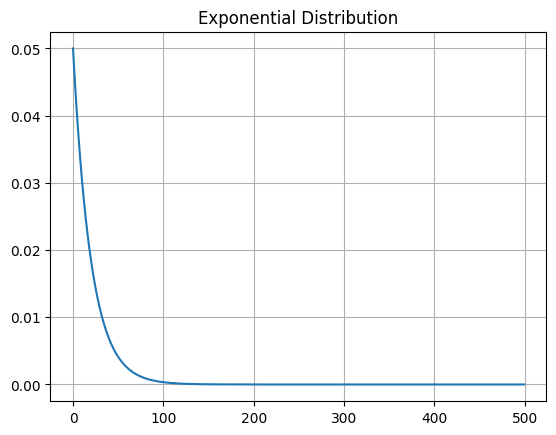

In [33]:
def calculate_pdf_exponentital(sample, scale_factor):
  return scale_factor * np.power(np.e, -scale_factor*sample)


views_each_day = 20
scale_factor = 1/views_each_day
variance = 1/np.square(scale_factor) # 1/lambda square
standard_deviation = np.sqrt(variance)

# Get random data from an exponential distribution
sample_views_per_day = np.arange(0, 500)
sample_densities = [calculate_pdf_exponentital(view, scale_factor) for view in sample_views_per_day]

plt.figure()
plt.title("Exponential Distribution")
plt.plot(sample_views_per_day, sample_densities)
plt.grid()
plt.show()

Now from the above graph we want to calculate the probability of getting 80-90 viewers each day.

As we discussed earlier, we can consider the area under the curve between these range as a rectangle and a right angled triangle. We can then calculate area of both of these and sum them up to get an approximate probability.

In our case the probability density for 80 views is 0.00095 and 0.00055 respectively. So, the equation for probability becomes:

\begin{equation}
P(80 \leq y \leq 90) \approx Area_{reactangle} + Area_{triangle} \\
P(80 \leq y \leq 90) \approx (90-80)*0.00055 + \frac{1}{2} * (90-80) * (0.00095 - 0.00055) \\
P(80 \leq y \leq 90) \approx 0.00736
\end{equation}

In [34]:
range_start = 80
range_end = 90
probability_density_start = calculate_pdf_exponentital(range_start, scale_factor)
probability_density_end = calculate_pdf_exponentital(range_end, scale_factor)

print(f"The probability density of getting {range_start} views each day is {probability_density_start}")
print(f"The probability density of getting {range_end} views each day is {probability_density_end}")

area_rectangle = (range_end - range_start) * np.min([probability_density_start, probability_density_end])
area_triangle = (1/2) * (range_end - range_start) * np.abs(probability_density_start - probability_density_end)

probability_range = area_rectangle + area_triangle

print(f"The probability of getting {range_start} to {range_end} views each day is approximately {probability_range}")

The probability density of getting 80 views each day is 0.0009157819444367093
The probability density of getting 90 views each day is 0.0005554498269121155
The probability of getting 80 to 90 views each day is approximately 0.007356158856744124


**Transforming exponential distribution to a normal distribution**

Exponentital distribution does not contain any known tables. Therefore, for statistical analysis we usually perform a transformation and convert it into a **normal distribution**. The equation to transform an exponential distribution $Exp(\lambda)$ to a normal distribution $N(\mu, \sigma^2)$ is as follows:

\begin{equation}
Y \sim Exp(\lambda) \\
X \sim ln(Y) \\
X \sim N(\mu, \sigma^2)
\end{equation}

Therefore, applying 'ln' to the output of an exponential distribution and we will then get a normal distribution. However, a simple logarithmic transformation will not work as both the distribution have different type of curves.

**In statistics we can use this transformed data to perform linear regression.**

## Logistic Distribution

It is defined as follows:

\begin{equation}
X \sim Logistic(\mu, S)
\end{equation}

It states that 'X' follows a logistic distribution with a mean (**also called location**) of $\mu$ and a scale of 'S'.

**We use this type of distribution when we want to find out how a continuous input of random variables can affect the probability of a binary outcome.**

For example, we want to determine if the probability of scoring a point increases as the speed of serving a tennis ball increases. Here, we have a continuous random variable i.e. the speed of the serve. The outcome can be of two types - whether the player scores a point or not. Furthermore, if a player serves a ball too fast, the accuracy of the serve reduces. On the other hand, if the player serves the ball too slow, they will miss the opportunity to score a point. **So, a linear relationship does not exist between the speed of the serve and the scoring of a point.** In this case we can use a logistic distribution.


### Equation of Expected Value

The expected value $E(X)$ of the distribution is equal to the mean $\mu$.

### Equation of Variance
The variance of the distribution $\sigma^2$ is equal to:

\begin{equation}
Var(Y) = \sigma^2 = \frac{S^2 \pi^2}{3}
\end{equation}

Here,
- 'S' is the scaling factor. The scaling factor $S$ determines how spread out the curve is.

- The mean $\mu$ determines the optimal speed of serve in our case. As a speed moves further away from it, the probability of scoring a point decreases.

### Equation for Probability Density

The equation to calculate the probability density of a logistic distribution is as follows:

\begin{equation}
p(y) = \frac{e^{-\frac{x - \mu}{s}}}{s(1 + e^{-\frac{x - \mu}{s}})^2}
\end{equation}



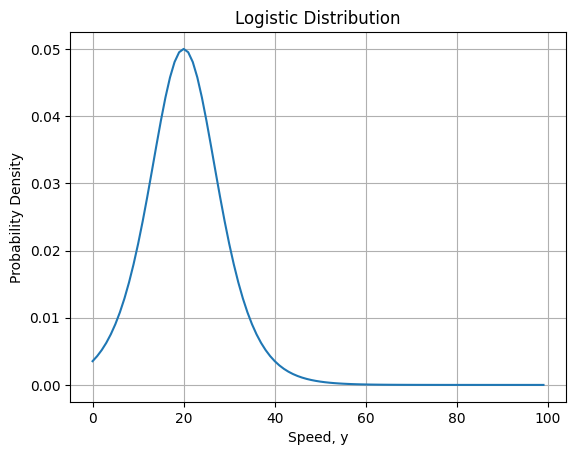

In [35]:
def calculate_pdf_logistic(sample, mean, scaling_factor):
  e = np.power(np.e, -1 * (sample -mean)/scaling_factor)

  return e/(scaling_factor * np.square(1 + e))


optimal_speed = 20 # mph
scaling_factor = 5

speeds = np.arange(100)
densities = [calculate_pdf_logistic(speed, optimal_speed, scaling_factor) for speed in speeds]

plt.figure()
plt.title("Logistic Distribution")
plt.plot(speeds, densities)
plt.xlabel("Speed, y")
plt.ylabel("Probability Density")
plt.grid()
plt.show()

The graph of a logistic distribution looks like the graph of a normal distribution.

**References:**

1. [The Data Science Course: Complete Data Science Bootcamp](https://www.udemy.com/share/101W9c3@oEFxH6jfeF78cKv-RDiIPVbI_iJt7crj25dGEjsiIRt9MbSV8n50dmB7AlanMAikNg==/)

2. [Youtube: 3Blue1Brown - Why “probability of 0” does not mean “impossible”](https://youtu.be/ZA4JkHKZM50)

3. [Scipy - T Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

4. [Scipy - Gamma Function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html#scipy.special.gamma)

5. [Statology](https://www.statology.org/plot-chi-square-distribution-python/)

6. [YouTube: The Organic Chemistry Tutor - Probability Exponential Distribution Problems](https://youtu.be/J3KSjZFVbis)